In [281]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from collections import OrderedDict
import seaborn as sns
import os
import sys
from datetime import datetime, timedelta, date

#sns.set(style="whitegrid", context="talk")
sns.set(style="whitegrid")
sns.set_color_codes("dark")

#GREY = '#ABB2B9'
#GREEN = '#4CAF50'
#BLUE = '#1565C0'
#AMBER = '#FF9800'
#RED = '#D32F2F'

GREY = '#9B9B9B'
GREEN = '#06C454'
BLUE = '#2E50FB'
AMBER = '#FFC300'
RED = '#D32F2F'

RESPONSE_TYPES = {
    'N/A':0,
    'Closed': 1,
    'Completed':2,
    'Remediation in progress':3,
    'Rejected':4,
    'Acknowledged':5,
    'No Response':6
}

PCA_COMPLIANCE = {
    'NON-COMPLIANT':5, 
    'NON-COMPLIANT ':5, 
    'NON-COMPLIANT f':5, 
    'NON-COMPLIANT(F)':5, 
    'PARTIALLY COMPLIANT':4, 
    'PARTIALLY COMPLIANT ':4, 
    'PARTIALLY COMPLIANT f':4,
    'PARTIALLY COMPLIANT(F)':4,
    'COMPLIANT':3,
    'FULLY COMPLIANT':3,
    'FULLY COMPLIANT ':3,
    'FULLY COMPLIANT f':3,
    'TRANSFER':2,
    'RESOLVED':2,
    'N/a':1,
    'N/A':1
}

PCA_COMPLIANCE_INVERSE = {
    5:'NON-COMPLIANT', 
    4:'PARTIALLY COMPLIANT', 
    3:'FULLY COMPLIANT',
    2:'RESOLVED/TRANSFERED',
    1:'N/A'
}


SCA_COMPLIANCE = {
    '0 - n/a':0,
    '1 - Very Inadequate / Major Non-Conformity':1,
    '2 - Inadequate / Minor Non-Conformity (high severity)':2,
    '3 - Partially adequate / Minor Non-Conformity (low severity)':3,
    '4 - Broadly adequate / Observation':4,
    '5 - Substantially adequate / Compliant':5,
    'TRANSFER':6
}

SCA_COMPLIANCE_INVERSE = {
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant',
    6:'TRANSFER'
}

today = datetime.now().strftime('%d-%m-%Y')
week_num = datetime.today().strftime('%Y Week %W')

week = datetime.today().strftime('%W')

default_date_v = date(2018,10,31)
default_date_h = date(2018,5,18)

print default_date_v.strftime('%d/%m/%Y')

31/10/2018


# Reporting Notes
- We need to show a heatmap of the current snapshot
- Heatmap needed for PCA DPIA view i.e 1 , 2 .. 80
- Heatmap needed for PCA Cookbook view i.e. 1H, 2H, 7V .. 80V
- Heatmap per practice for the above heatmaps
- Project code heatmap
- Project reject heatmap

In [282]:
ls

All_REMEDIATION_STATS.xlsx
Archive Output/
Archive Responses/
Baseline-Per-Practice-Heatmap30-04-2018.png
burndown first baseline.xlsx
burndown.xlsx
compliancy_heatmap_28-04-2018.png
compliancy_heatmap_29-04-2018.png
compliancy_heatmap_30-04-2018.png
Compliancy-Heatmap.ipynb
CompliancyReport.html
Convert-RS-2.2.ipynb
Convert-RS-3.0.ipynb
Convert-RS-4.ipynb
Cookbook/
dump.xlsx
Error Files/
GDPR-SNAPSHOT-28-04-2018.xlsx
GDPR-SNAPSHOT-30-04-2018.xlsx
heatmap_baseline/
heatmap.html
HV-Breakdown-Compliancy-Heatmap30-04-2018.png
HV-Breakdown-Per-Practice-Heatmap30-04-2018.png
old_output_rs/
old RS versions/
output_rs/
output_rs (copy)/
PCA-ComliancyCount-30-04-2018.png
PCA-Compliancy-Heatmap30-04-2018.png
PCA_HEATMAP.xlsx
PCA-ProjectCodeStatus-30-04-2018.png
PCA-Responses-30-04-2018.png
Per-Practice-Heatmap30-04-2018.png
README.md
REMEDIATION_STATS.xlsx
Reports/
RS_FEEDBACK/
RS_responses/
RS_responses (copy)/
Transfer-RS-Responses.ipynb
Transfer-RS-Responses-V2.ipynb


In [283]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback'

In [284]:
dateparse = lambda x: pd.datetime.strptime(x, '%d-%m-%Y')
#df = pd.read_csv(infile, parse_dates=['datetime'], date_parser=dateparse)#pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx', na_values=[""], keep_default_na=False)
#sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-27-04-2018.xlsx', na_values=[""], keep_default_na=False)
#pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week19-10-05-2018.xlsx', na_values=[""], keep_default_na=False)
#sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week19-10-05-2018.xlsx', na_values=[""], keep_default_na=False)
pca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week21-24-05-2018.xlsx', na_values=[""], keep_default_na=False)
sca_df = pd.read_excel('./RS_FEEDBACK/All/All-REMEDIATION-STATS-Week21-24-05-2018.xlsx', na_values=[""], keep_default_na=False)



In [285]:
#new_df = pd.to_datetime(pca_df[pca_df['Product ID']==176]['Delivery Date'], format='%dth %B %Y')
#index_loc = pca_df[pca_df['Product ID']==176].index
#pca_df.loc[index_loc,'DELIVERY_DATE'] = new_df

pca_df['Delivery Date'].replace('None', np.nan, inplace=True)

In [286]:
#ll ./Reports/2018\ Week\ 18/

# Inpute basline

In [287]:
#Note: going forward, read in the baseline from the previous snapshot.

#pca_baseline = pd.read_excel('./heatmap_baseline/EPS_PCA_Heatmap_27 Apr18_v3.xlsx')
#pca_baseline = pd.read_excel('./Reports/Baseline/GDPR-SNAPSHOT-Baseline.xlsx', sheet_name='PCA Rollup Baseline')
#sca_baseline = pd.read_excel('./Reports/Baseline/GDPR-SNAPSHOT-Baseline.xlsx', sheet_name='SCA Baseline')
pca_baseline = pd.read_excel('./Reports/2018 Week 20/GDPR-SNAPSHOT-Week20-18-05-2018.xlsx', sheet_name='PCA Rollup Baseline')
sca_baseline = pd.read_excel('./Reports/2018 Week 20/GDPR-SNAPSHOT-Week20-18-05-2018.xlsx', sheet_name='SCA Baseline')
sca_baseline.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation


In [288]:
pca_baseline[24]

1     TRANSFER
2     TRANSFER
3          NaN
4     TRANSFER
5     TRANSFER
6     TRANSFER
7          NaN
8          NaN
9          NaN
10         NaN
11    TRANSFER
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
        ...   
51    TRANSFER
52    TRANSFER
53         NaN
54         NaN
55         NaN
56         NaN
57    TRANSFER
58    TRANSFER
59         NaN
60    TRANSFER
61    TRANSFER
62    TRANSFER
63         NaN
64         NaN
65         NaN
66         NaN
67         NaN
68    TRANSFER
69         NaN
70         NaN
71    TRANSFER
72         NaN
73    TRANSFER
74    TRANSFER
75    TRANSFER
76    TRANSFER
77         NaN
78         NaN
79         NaN
80         NaN
Name: 24, Length: 80, dtype: object

In [289]:
#pca_df['Req nr'][8][-1:]

def return_default_date( x ):
    if x[-1:] == 'H':
        return default_date_h
    elif x[-1:] == 'V':
        return default_date_v
    else:
        return default_date_v


In [290]:
HFilter = pca_df['Req nr'].str.contains('H')
VFilter = pca_df['Req nr'].str.contains('V')

#Hindex_loc = pca_df[HFilter].index


In [291]:
index = pca_df[HFilter].index

pca_df.loc[index, 'Delivery Date'].fillna(default_date_h, inplace=True)
#pca_df.loc[index, 'Delivery Date']

In [292]:
#HFilter = pca_df['Req nr'].str.contains('H')
#VFilter = pca_df['Req nr'].str.contains('V')

#Hindex_loc = pca_df[HFilter].index

#pca_df.loc[Hindex_loc, 'Delivery Date'].fillna(default_date_h, inplace=True)
#pca_df.loc[Hindex_loc].replace(to_replace='tbc', value='TBC', inplace=True)
#pca_df.loc[Hindex_loc].replace(to_replace='GE-PCA-75H', value=default_date_h, inplace=True)
#pca_df.loc[Hindex_loc,'Delivery Date'].replace(to_replace={'Delivery Date':{None:default_date_h}}, inplace=True)


#Vindex_loc = pca_df[VFilter].index

#pca_df.loc[Vindex_loc, 'Delivery Date'].fillna(default_date_v, inplace=True)

#pca_df['Delivery Date'].replace(to_replace='11th May 2018', value=date(2018,5,11), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='30th April 2018', value=date(2018,4,30), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='25/05/18', value=date(2018,5,25), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='25/09/18', value=date(2018,9,25), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='30/10/18', value=date(2018,10,30), inplace=True)
#pca_df['Delivery Date'].replace(to_replace='GE-PCA-75H', value=default_date_h, inplace=True)
#pca_df.loc[Vindex_loc,'Delivery Date'] = pca_df.loc[Vindex_loc].replace(to_replace={'Delivery Date':{None:default_date_v}}, inplace=True, regex=False)
#pca_df.loc[Vindex_loc,'Delivery Date'] = pca_df.loc[Vindex_loc,'Delivery Date'].replace(to_replace='TBC', value=default_date_v, inplace=True)


In [293]:
pca_df[pca_df['Product ID']==176][['Delivery Date','Req nr']].iloc[8]

Delivery Date    2018-05-22 00:00:00
Req nr                           52H
Name: 525, dtype: object

In [294]:
pca_df['Delivery Date'].value_counts(dropna=False).sum()

7012

In [295]:
OUTPUT_BASE_DIR = './Reports/'+week_num
#OUTPUT_BASE_DIR = './Reports/Test'

if not os.path.exists(OUTPUT_BASE_DIR):
    os.mkdir(OUTPUT_BASE_DIR)

In [296]:
ll Reports/Baseline

total 2124
-rw-rw-r-- 1 andy  61764 May  3 11:24 Baseline-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy 584334 May  3 22:47 GDPR-SNAPSHOT-Baseline (copy).xlsx
-rw-rw-r-- 1 andy 513325 May  3 11:21 GDPR-SNAPSHOT-Baseline (old).xlsx
-rw-rw-r-- 1 andy 591188 May  4 13:45 GDPR-SNAPSHOT-Baseline.xlsx
-rw-rw-r-- 1 andy  68733 May  3 11:27 HV-Breakdown-Compliancy-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  76043 May  3 11:27 HV-Breakdown-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  18866 May  3 11:27 PCA-Burndown-03-05-2018.png
-rw-rw-r-- 1 andy  23491 May  3 11:27 PCA-Burndown-Per-Practice-03-05-2018.png
-rw-rw-r-- 1 andy  56310 May  3 11:27 PCA-Compliancy-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  61764 May  3 11:27 PCA-Per-Practice-Heatmap-03-05-2018.png
-rw-rw-r-- 1 andy  28710 May  3 11:27 PCA-ProjectCodeStatus-03-05-2018.png
-rw-rw-r-- 1 andy  33279 May  3 11:27 PCA-Responses-03-05-2018.png
-rw-rw-r-- 1 andy  25210 May  3 10:45 PCA-RiskCategory-03-05-2018.png


In [297]:
pca_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-05-15,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,EPS-PCA-1H,EPS147-PCA-1H-A,1H,Acknowledged,NaN,EPS147-PCA-1H,PCA,Project Code Allocated,UC,A,HORIZONTAL,NaN,NaN,NaN
1,NON-COMPLIANT,2018-05-18,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-4H,EPS147-PCA-4H-A,4H,Acknowledged,NaN,EPS147-PCA-4H,PCA,Project Code Allocated,UC,B,HORIZONTAL,NaN,NaN,NaN
2,PARTIALLY COMPLIANT,2018-05-18,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57H-A,57H,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57H,PCA,No Project Code,UC,F,HORIZONTAL,NaN,NaN,NaN
3,PARTIALLY COMPLIANT,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57V-A,57V,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57V,PCA,No Project Code,UC,F,VERTICAL,NaN,NaN,NaN
4,PARTIALLY COMPLIANT,2018-10-31,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-57H,EPS147-PCA-58H-A,58H,Acknowledged,NaN,EPS147-PCA-58H,PCA,Project Code Allocated,UC,F,HORIZONTAL,NaN,NaN,NaN


In [298]:
pca_baseline[27].value_counts()

PARTIALLY COMPLIANT       15
FULLY COMPLIANT           12
RESOLVED                   8
NON-COMPLIANT              6
NON-COMPLIANT(F)           2
PARTIALLY COMPLIANT(F)     1
Name: 27, dtype: int64

In [299]:
compliancy_stats = pca_baseline.apply(pd.Series.value_counts)

In [300]:
compliancy_stats.fillna(0,inplace=True)
compliancy_stats.columns.name = 'Product ID'
compliancy_stats[27]

FULLY COMPLIANT           12.0
NON-COMPLIANT              6.0
NON-COMPLIANT(F)           2.0
PARTIALLY COMPLIANT       15.0
PARTIALLY COMPLIANT(F)     1.0
RESOLVED                   8.0
TRANSFER                   0.0
Name: 27, dtype: float64

In [301]:
#fig, ax = plt.subplots(figsize=(25,10))

#sns.barplot(x=67, data=compiancy_stats,
#            label="Total", color="b")

#sns.barplot(data=compliancy_stats.loc['FULLY COMPLIANT'],  ax=ax, saturation=1, palette='Set3')
#sns.barplot(data=compliancy_stats, x='PARTIALLY COMPLIANT',  saturation=1, palette='Set3')
#ax = sns.factorplot(data=pca_baseline, ax=ax, x=68, saturation=1, palette='Set3')
#ax = sns.factorplot(data=compiancy_stats.T, ax=ax, x='TRANSFER',saturation=1, palette='Set3')
#ax.set_ylabel("Count")
#ax.set_title("Chart to show all PCA compliancy counts per product: "+today, size=20)
#fig.savefig("./PCA-ComliancyCount-"+today+".png")

In [302]:
pca_baseline.loc[76][198]

nan

In [303]:
pca_rollup_target = pca_baseline.copy()
pca_rolled_up_heatmap_forecast = pca_baseline.copy()

In [304]:
pca_rolled_up_heatmap_forecast[24]

1     TRANSFER
2     TRANSFER
3          NaN
4     TRANSFER
5     TRANSFER
6     TRANSFER
7          NaN
8          NaN
9          NaN
10         NaN
11    TRANSFER
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
30         NaN
        ...   
51    TRANSFER
52    TRANSFER
53         NaN
54         NaN
55         NaN
56         NaN
57    TRANSFER
58    TRANSFER
59         NaN
60    TRANSFER
61    TRANSFER
62    TRANSFER
63         NaN
64         NaN
65         NaN
66         NaN
67         NaN
68    TRANSFER
69         NaN
70         NaN
71    TRANSFER
72         NaN
73    TRANSFER
74    TRANSFER
75    TRANSFER
76    TRANSFER
77         NaN
78         NaN
79         NaN
80         NaN
Name: 24, Length: 80, dtype: object

In [305]:
pca_rollup_target.fillna('N/A', inplace=True)
pca_rolled_up_heatmap_forecast.fillna('N/A', inplace=True)

for key in PCA_COMPLIANCE.keys():
    pca_rollup_target.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)
    pca_rolled_up_heatmap_forecast.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)


In [306]:
#pca_rollup_target[24]
pca_rollup_target[24]

1     2
2     2
3     1
4     2
5     2
6     2
7     1
8     1
9     1
10    1
11    2
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
     ..
51    2
52    2
53    1
54    1
55    1
56    1
57    2
58    2
59    1
60    2
61    2
62    2
63    1
64    1
65    1
66    1
67    1
68    2
69    1
70    1
71    2
72    1
73    2
74    2
75    2
76    2
77    1
78    1
79    1
80    1
Name: 24, Length: 80, dtype: int64

In [307]:


PRACTICE = 'ALL'

iot_set = set([67,68,89,90,91,94,97,101,102,103,109,110])
cloud_set = set([43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116])
connectivity_set = set([10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158])
eit_set = set([126,136,141,128,130,129,198,127,1])
uc_set = set([2,4,5,7,8,9,14,70,71,87,123,193,194,195,147])

iot_cols = [67,68,89,90,91,94,97,101,102,103,109,110]
cloud_cols = [43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116]
connectivity_cols = [10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158]
eit_cols = [126,136,141,128,130,129,198,127,1]
uc_cols = [2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]

In [308]:
connectivity_cols

[10, 12, 21, 22, 27, 28, 29, 31, 33, 42, 66, 72, 80, 81, 118, 121, 156, 158]

In [309]:
def return_practice( prod_id ):
    if prod_id in iot_set:
        return 'IoT'
    elif prod_id in cloud_set:
        return 'Cloud'
    elif prod_id in connectivity_set:
        return 'Connectivity'
    elif prod_id in eit_set:
        return 'EIT'
    elif prod_id in uc_set:
        return 'UC'
    else:
        return 'Unknown Practice'

pca_df['Practice'] = pca_df['Product ID'].map(lambda x: return_practice(x))
sca_df['Practice'] = sca_df['Product ID'].map(lambda x: return_practice(x))


In [310]:
pca_df = pca_df[pca_df['Category'] == 'PCA']
sca_df = sca_df[sca_df['Category'] == 'SCA']
sca_df

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
12,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.1-A-A,9.2.1-A,Acknowledged,NaN,EPS147-SCA-9.2.1-A,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
13,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.2-A,9.2.2,Acknowledged,NaN,EPS147-SCA-9.2.2,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
14,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.3-A,9.2.3,Acknowledged,NaN,EPS147-SCA-9.2.3,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
15,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.5-A,9.2.5,Acknowledged,NaN,EPS147-SCA-9.2.5,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
16,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.6-A-A,9.2.6-A,Acknowledged,NaN,EPS147-SCA-9.2.6-A,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
17,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.6-B-A,9.2.6-B,Acknowledged,NaN,EPS147-SCA-9.2.6-B,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
18,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.4.1-A,9.4.1,Acknowledged,NaN,EPS147-SCA-9.4.1,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
19,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.4.2-A,9.4.2,Acknowledged,NaN,EPS147-SCA-9.4.2,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
20,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-12.4.1-A,12.4.1,Acknowledged,NaN,EPS147-SCA-12.4.1,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
21,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-12.4.3-A,12.4.3,Acknowledged,NaN,EPS147-SCA-12.4.3,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN


In [311]:
pca_df[pca_df['Product ID'] == 24]

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA


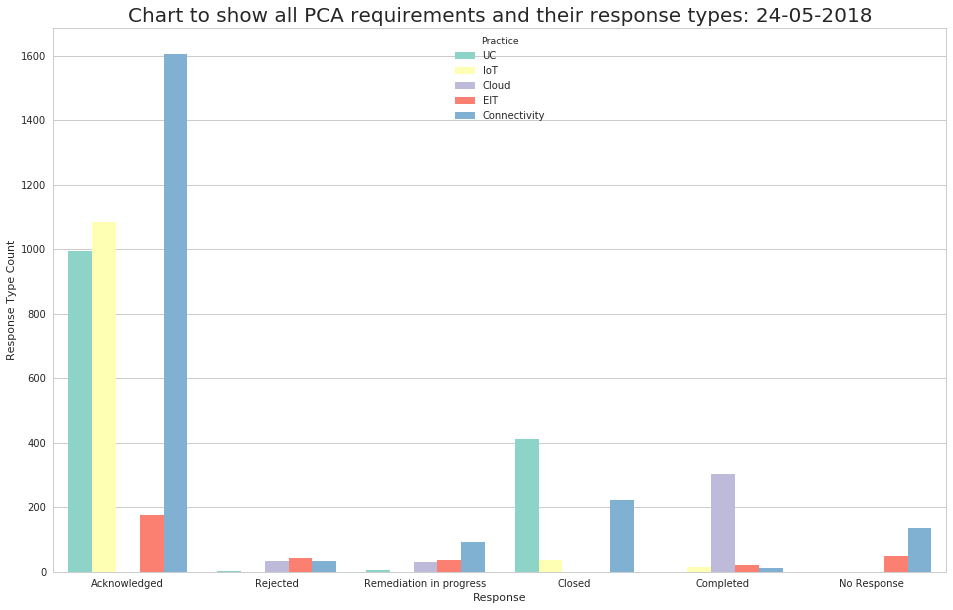

In [312]:
fig, ax = plt.subplots(figsize=(16,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Response', hue='Practice', saturation=1, palette='Set3')
ax.set_ylabel("Response Type Count")
ax.set_title("Chart to show all PCA requirements and their response types: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-Responses-"+today+".png")

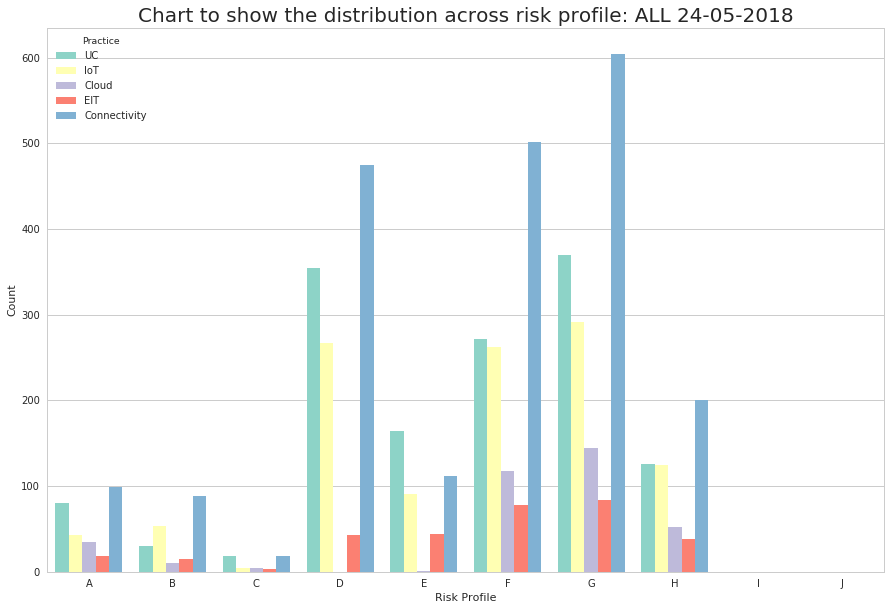

In [313]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Risk Category', hue='Practice',order=['A','B','C','D','E','F','G','H','I','J'],
                   saturation=1, palette='Set3')
ax.set_ylabel("Count")
ax.set_xlabel("Risk Profile")
ax.set_title("Chart to show the distribution across risk profile: "+PRACTICE+" "+today, size=20)

#ax.tick_params(axis='x', colors='white')
#ax.tick_params(axis='y', colors='white')

#font = {'family': 'sans serif',
#        'color':  'green',
#        'weight': 'bold',
#        'size': 12,
#        }

fig.savefig(OUTPUT_BASE_DIR+"/PCA-Risk-Profile-Distribution-"+today+".png")# transparent=True, fontdict=font)

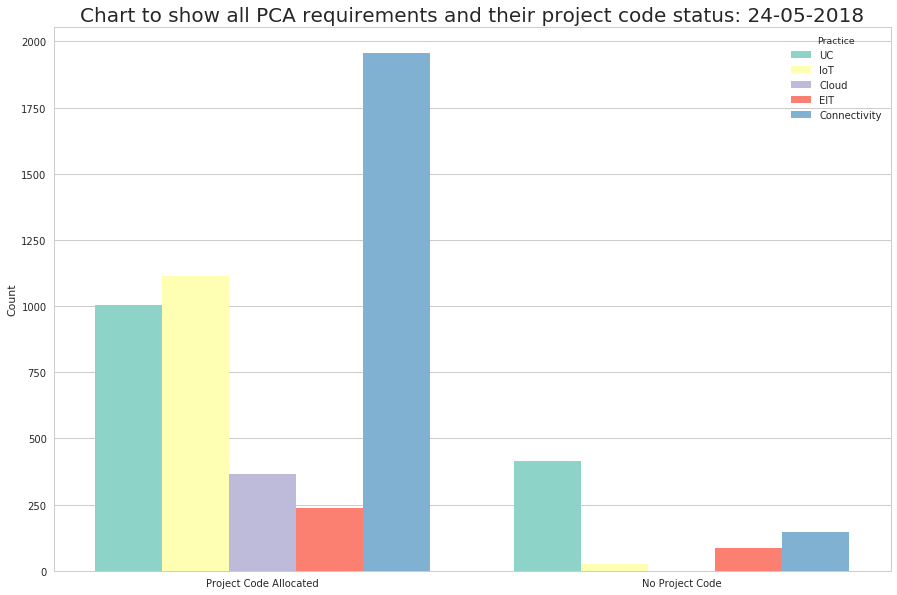

In [314]:
fig, ax = plt.subplots(figsize=(15,10))

ax = sns.countplot(data=pca_df, ax=ax, x='Orphan', hue='Practice', saturation=1, palette='Set3')
ax.set_ylabel("Count")
ax.set_xlabel("")
ax.set_title("Chart to show all PCA requirements and their project code status: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-ProjectCodeStatus-"+today+".png")

In [315]:
#fig, ax = plt.subplots(figsize=(15,10))

#ax = sns.countplot(data=pca_df, ax=ax, x='Risk Category', hue='Practice', saturation=1, palette='Set3')
#ax.set_ylabel("Count")
#ax.set_xlabel("")
#ax.set_title("Chart to show all PCA requirements and their and their risk category: "+today, size=20)
#fig.savefig(OUTPUT_BASE_DIR+"/PCA-RiskCategory-"+today+".png")

In [316]:
COLS = [67,68,89,90,91,94,97,101,102,103,109,110,43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,126,136,141,128,130,129,198,127,1,2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]
INDEX = ['1H','2H','3H','4H','5H','6V','7V','8H','9V','10V','11H','11V','12H','12V','13aH','13aV','13bH','13bV',
'14H','14V','15V','16V','17V','18H','18V','19V','20H','20V','21V','22V','23V','24V','25V','26V','27V','28V','29H',
'30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H','38V','39H','39V','40H','40V','41H','41V','42H',
'42V','43H','43V','44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V',
'55V','56V','57H','57V','58H','59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V',
'70V','71V','72V','73H','74V','75H','76H','76V','77V','78V','79H','79V','80H']


converter = {'7H':'7V', 1: '1H', 2:'2H', 3:'3H', 5:'5H', 7:'7V', 9:'9V', 11:'11V', 12:'12V', 14:'14V', 15:'15V', 16:'16V',
             17:'17V', 18:'18V', 19:'19V', 20:'20V', 21:'21V', 22:'22V', 23:'23V', 26:'26V', 27:'27V', 28:'28V', 30:'30H', 
             31:'31H', 32:'32V', 35:'35H', 37:'37V', 38:'38V', 40:'40V', 41:'41V', 42:'42V', 43:'43H', 44:'44V', 45:'45V', 46:'46V', 
             47:'47V', 48: '48V', 49: '49V', 50:'50H', 51:'51V', 54:'54V', 57:'57V', 58:'58H', 59:'59V', 60:'60H', 61:'61V', 62:'62V', 63:'63H', 
             66:'66H', 67:'67H', 69:'69V', 70:'70V', 73:'73H', 74:'74V', 75:'75H', 76:'76V', 79:'79V'}

roll_up_converter = {'1H':1, '2H':2, '3H':3, '4H':4, '5H':5, '6V':6, '7V':7, '7H':7, '8H':8, '9V':9, 
                     '10V':10, '11H':11, '11V':11, '12H':12, '12V':12, '13aH':13, '13aV':13,
                     '13bH':13, '13bV':13, '14H':14, '14V':14, '15V':15,'16V':16, '17V':17, 
                     '18H':18, '18V':18, '19V':19, '20H':20, '20V':20, '21V':21, '22V':22, 
                     '23V':23, '24V':24, '25V':25, '26V':26, '27V':27, '28V':28, '29H':29,
                     '30H':30, '31H':31, '32H':32, '32V':32, '33V':33, '34V':34, '35H':35, '36H':36, 
                     '37H':37, '37V':37, '38H':38, '38V':38, '39H':39, '39V':39, '40H':40,
                     '40V':40, '41H':41, '41V':41, '42H':42, '42V':42, '43H':43, '43V':43, '44V':44,
                     '45V':45, '46H':46, '46V':46, '47H':47, '47V':47, '48H':48, '48V':48,
                     '49H':49, '49V':49, '50H':50, '51V':51, '52H':52, '52V':52, '53V':53,
                     '54V':54, '55V':55, '56V':56, '57H':57, '57V':57, '58H':58, '59V':59,
                     '60H':60, '61H':61, '61V':61, '62H':62, '62V':62, '63H':63, '64H':64,
                     '65H':65, '66H':66, '67H':67, '68H':68, '69H':69, '69V':69, '70V':70,
                     '71V':71, '72V':72, '73H':73, '74V':74, '75H':75, '76H':76, '76V':76,
                     '77V':77, '78V':78, '79H':79, '79V':79, '80H':80}


In [317]:
heatmap_df = pd.DataFrame(columns=COLS, index=INDEX)
heatmap_df = heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                         43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                         10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                         126,136,141,128,130,129,198,127,1,
                         2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

response_heatmap = pd.DataFrame(columns=COLS, index=INDEX)
response_heatmap = response_heatmap[[67,68,89,90,91,94,97,101,102,103,109,110,
                         43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                         10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                         126,136,141,128,130,129,198,127,1,
                         2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

In [318]:
SCA_INDEX = ['9.2.1-A',
'9.2.2',
'9.2.3',
'9.2.5',
'9.2.6-A',
'9.2.6-B',
'9.4.1',
'9.4.2',
'12.4.1',
'12.4.3',
'13.1.1-R',
'13.2.1',
'13.2.2',
'14.1.2',
'18.1.4']


sca_response_heatmap_df = pd.DataFrame(columns=COLS, index=SCA_INDEX)
sca_response_heatmap_df = sca_response_heatmap_df[[67,68,89,90,91,94,97,101,102,103,109,110,
                                 43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,
                                 10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,
                                 126,136,141,128,130,129,198,127,1,
                                 2,4,5,7,8,9,14,70,71,87,123,193,194,195,147]]

sca_heatmap_df = sca_baseline.copy()
sca_response_heatmap_df = sca_baseline.copy()
sca_response_heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation


In [319]:
"""
SCA_COMPLIANCE = {
    '0 - n/a':0,
    '1 - Very Inadequate / Major Non-Conformity':1,
    '2 - Inadequate / Minor Non-Conformity (high severity)':2,
    '3 - Partially adequate / Minor Non-Conformity (low severity)':3,
    '4 - Broadly adequate / Observation':4,
    '5 - Substantially adequate / Compliant':5
    '5 - Substantially  adequate / Compliant
}

RESPONSE_TYPES = {
    'N/A':0,
    'Closed': 1,
    'Completed':2,
    'Remediation in progress':3,
    'Rejected':4,
    'Acknowledged':5,
    'No Response':6
}
"""

sca_response_heatmap_df.replace(to_replace=list(SCA_COMPLIANCE.keys()), value=list(SCA_COMPLIANCE.values()), inplace=True)
sca_response_heatmap_df.replace(to_replace=[1,2,3,4,5], value=[7,7,7,7,7], inplace=True)
sca_response_heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,7,7,7,0,7,7,7,0,7,7,...,0,7,7,7,0,7,0,7,0,7
9.2.2,7,7,7,0,7,7,7,0,7,7,...,7,0,0,0,0,0,0,0,0,7
9.2.3,7,7,7,0,7,7,7,0,7,7,...,7,0,0,0,0,0,0,0,0,7
9.2.5,7,7,7,0,7,7,7,0,7,7,...,7,7,7,0,7,7,0,7,0,7
9.2.6-A,7,7,7,0,7,7,7,0,7,7,...,7,7,7,0,0,7,0,7,0,7


In [320]:
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2654
NON-COMPLIANT            1548
PARTIALLY COMPLIANT f     368
PARTIALLY COMPLIANT       318
NON-COMPLIANT f           262
N/A                       130
NON-COMPLIANT              40
FULLY COMPLIANT            19
COMPLIANT                   4
N/a                         3
Name: Compliance Assessment, dtype: int64

In [321]:
pca_df['Compliance Assessment'].fillna('UNKNOWN', inplace=True)

In [322]:
#pca_df[pca_df['Product ID'] == 22]
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2654
NON-COMPLIANT            1548
PARTIALLY COMPLIANT f     368
PARTIALLY COMPLIANT       318
NON-COMPLIANT f           262
N/A                       130
NON-COMPLIANT              40
FULLY COMPLIANT            19
COMPLIANT                   4
N/a                         3
Name: Compliance Assessment, dtype: int64

In [323]:
pca_baseline[27].value_counts()

PARTIALLY COMPLIANT       15
FULLY COMPLIANT           12
RESOLVED                   8
NON-COMPLIANT              6
NON-COMPLIANT(F)           2
PARTIALLY COMPLIANT(F)     1
Name: 27, dtype: int64

## Set the target heatmap the same as the previous baseline

In [324]:
#pca_df['Req Ref'].str.slice(11, -2)
heatmap_df.fillna('N/A',inplace=True)

for col in heatmap_df.columns:
    for row in heatmap_df.index:
        heatmap_df.loc[row][col] = pca_rollup_target.loc[int(row.strip('HVab'))][col]

heatmap_df[118]

1H      3
2H      3
3H      2
4H      5
5H      3
6V      3
7V      3
8H      1
9V      2
10V     2
11H     2
11V     2
12H     1
12V     1
13aH    2
13aV    2
13bH    2
13bV    2
14H     1
14V     1
15V     3
16V     2
17V     1
18H     1
18V     1
19V     3
20H     1
20V     1
21V     1
22V     3
       ..
57H     3
57V     3
58H     1
59V     1
60H     4
61H     3
61V     3
62H     3
62V     3
63H     1
64H     1
65H     1
66H     4
67H     4
68H     1
69H     3
69V     3
70V     3
71V     3
72V     3
73H     4
74V     3
75H     3
76H     4
76V     4
77V     1
78V     1
79H     1
79V     1
80H     1
Name: 118, Length: 107, dtype: object

In [325]:
heatmap_df.loc['2H'][189]

5

In [326]:
pca_rollup_target[27].value_counts()

1    36
4    16
3    12
5     8
2     8
Name: 27, dtype: int64

In [327]:
forcast_heatmap_df = pca_df.copy()
sca_forcast_heatmap_df = sca_df.copy()

forcast_heatmap_df.loc[forcast_heatmap_df['Delivery Date'] <= '2018-05-25','Compliance Assessment'] = 'FULLY COMPLIANT'
sca_forcast_heatmap_df.loc[sca_forcast_heatmap_df['Delivery Date'] <= '2018-05-25','Compliance Assessment'] = '5 - Substantially adequate / Compliant'

sca_forcast_heatmap_df[sca_forcast_heatmap_df['Delivery Date'] <= '2018-05-25']

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
58,5 - Substantially adequate / Compliant,2018-05-25,2.0,GDPR-RS-EPS109-SME SOHO-V4.1 REVIEWED 160518.xlsx,109,"IOT-001, IOT-007",EPS109-SCA-9.2.5-A,9.2.5,Acknowledged,Confirmed by Tim Snape,EPS109-SCA-9.2.5,SCA,Project Code Allocated,IoT,UNKNOWN,VERTICAL,NaN,NaN,NaN
85,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-12.4.3-A,12.4.3,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-12.4.3,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN
86,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.1-A-A,9.2.1-A,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-9.2.1-A,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN
87,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.2-A,9.2.2,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-9.2.2,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN
88,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.3-A,9.2.3,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-9.2.3,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN
89,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.5-A,9.2.5,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-9.2.5,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN
90,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.6-A-A,9.2.6-A,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-9.2.6-A,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN
91,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.2.6-B-A,9.2.6-B,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-9.2.6-B,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN
92,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.4.1-A,9.4.1,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-9.4.1,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN
93,5 - Substantially adequate / Compliant,2018-05-04,2.0,GDPR-RS-EPS059-Primary-Storage-V4.1-REVIEWED-(...,59,PRJ03563,EPS059-SCA-9.4.2-A,9.4.2,Completed,The Cyber Security Baseline Portal has been up...,EPS059-SCA-9.4.2,SCA,Project Code Allocated,Cloud,UNKNOWN,VERTICAL,NaN,NaN,NaN


In [328]:
forcast_heatmap = heatmap_df.copy()

In [329]:
pca_df[pca_df['Product ID'] == 118]

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
2324,NON-COMPLIANT,2018-05-18,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-4H,EPS118-PCA-4H-A,4H,Acknowledged,Action on Product team to contact James Taylor...,EPS118-PCA-4H,PCA,Project Code Allocated,Connectivity,B,HORIZONTAL,NaN,NaN,NaN
2325,N/A,2018-05-18,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,No Response,EPS118-PCA-11H-A,11H,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS118-PCA-11H,PCA,No Project Code,Connectivity,D,HORIZONTAL,NaN,NaN,NaN
2326,N/A,2018-10-30,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,No Response,EPS118-PCA-11V-A,11V,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS118-PCA-11V,PCA,No Project Code,Connectivity,D,VERTICAL,NaN,NaN,NaN
2327,PARTIALLY COMPLIANT,2018-04-30,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-12H,EPS118-PCA-12H-A,12H,Acknowledged,Do we need to track this as 12V has been agree...,EPS118-PCA-12H,PCA,Project Code Allocated,Connectivity,D,HORIZONTAL,NaN,NaN,NaN
2328,N/A,2018-10-30,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,No Response,EPS118-PCA-12V-A,12V,Closed,changed from NC/PC as a result of Privacy 2nd ...,EPS118-PCA-12V,PCA,No Project Code,Connectivity,D,VERTICAL,NaN,NaN,NaN
2329,PARTIALLY COMPLIANT,2017-04-30,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-49H,EPS118-PCA-49H-A,49H,Acknowledged,Support/test teams make use of anonymization t...,EPS118-PCA-49H,PCA,Project Code Allocated,Connectivity,F,HORIZONTAL,NaN,NaN,NaN
2330,PARTIALLY COMPLIANT,2018-10-31,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,PRJ03373,EPS118-PCA-49V-A,49V,Acknowledged,Support/test teams make use of anonymization t...,EPS118-PCA-49V,PCA,Project Code Allocated,Connectivity,F,VERTICAL,NaN,NaN,NaN
2331,PARTIALLY COMPLIANT,2018-10-31,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,PRJ03373,EPS118-PCA-51V-A,51V,Acknowledged,Action on Product team to cross check current ...,EPS118-PCA-51V,PCA,Project Code Allocated,Connectivity,F,VERTICAL,NaN,NaN,NaN
2332,PARTIALLY COMPLIANT,2018-05-18,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-60H,EPS118-PCA-60H-A,60H,Acknowledged,Process to be developed by Catesian. Then casc...,EPS118-PCA-60H,PCA,Project Code Allocated,Connectivity,G,HORIZONTAL,NaN,NaN,NaN
2333,PARTIALLY COMPLIANT,2018-05-18,2.0,GDPR-RS-EPS118-Consolidated Spend Analytics-V4...,118,GE-PCA-66H,EPS118-PCA-66H-A,66H,Acknowledged,NaN,EPS118-PCA-66H,PCA,Project Code Allocated,Connectivity,G,HORIZONTAL,NaN,NaN,NaN


## Update the heatmaps with RS data

In [330]:
iter_count = 0

for p in COLS:
    prod_filter = pca_df['Product ID'] == p
    prod_df = pca_df[prod_filter]
    for r in prod_df['Req Ref']:
        if p == 193:
            pca = r[12:-2]
        else:
            pca = r[11:-2]
            
        #print("PCA ref: {0}".format(pca))
        if pca in INDEX:
            iter_count = iter_count + 1
            compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)
            
            # update the forecast heatmap.
            forcast_value = PCA_COMPLIANCE.get(forcast_heatmap_df[forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

            # collect a heatmap for responses.
            response_value = RESPONSE_TYPES.get(prod_df[prod_df['Req Ref'] == r]['Response'].iloc[0], 0)
            #print response_value
            if response_value < RESPONSE_TYPES.get(response_heatmap.loc[pca][p], 10):
                #print 'AB: update response heatmap'
                response_heatmap.loc[pca][p] = response_value
            
            
            
            if pca == '10V':
                if p == 118:
                    print 'AB 10V product = 118'
                    print compliance_value
                    print heatmap_df.loc[pca][p]
            
            if ((compliance_value < heatmap_df.loc[pca][p]) and (heatmap_df.loc[pca][p] != 2)):
                #print 'AB: update heatmap'
                heatmap_df.loc[pca][p] = compliance_value
                
            if forcast_value < forcast_heatmap.loc[pca][p]:
                forcast_heatmap.loc[pca][p] = forcast_value
                pca_rolled_up_heatmap_forecast.loc[roll_up_converter.get(pca)][p] = forcast_value
                
            #update the baseline
            if ((compliance_value < PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p])) and 
                (PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p]) != 2)): 
                pca_baseline.loc[roll_up_converter.get(pca)][p] = PCA_COMPLIANCE_INVERSE.get(compliance_value)
                #print("1b:Update baseline, value = {0}".format(pca_baseline.loc[roll_up_converter.get(pca)][p]))
                
            # update the rollup heatmap
            if ((compliance_value < pca_rollup_target.loc[roll_up_converter.get(pca)][p]) and 
                (pca_rollup_target.loc[roll_up_converter.get(pca)][p] != 2)):
                #if the compliance value is better than the baseline heatmap then update it.
                pca_rollup_target.loc[roll_up_converter.get(pca)][p] = compliance_value
                        
            if compliance_value == 0:
                print("1: Compliance Value: {0}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                print("1: Product: {0}".format(p))
                sys.exit("EXIT") # using this as an assert.
                
        else:
            if r in converter.keys():
                compliance_value = PCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)

                # update the forecast heatmap.
                forcast_value = PCA_COMPLIANCE.get(forcast_heatmap_df[forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 0)
                
                # collect a heatmap for responses.
                response_value = RESPONSE_TYPES.get(prod_df[prod_df['Req Ref'] == r]['Response'].iloc[0], 6)
                if response_value < RESPONSE_TYPES.get(response_heatmap.loc[pca][p], 10):
                    print 'AB else: update response heatmap'
                    response_heatmap.loc[pca][p] = response_value
                    
                # update the rollup heatmap
                if ((compliance_value < pca_rollup_target.loc[roll_up_converter.get(pca)][p]) and 
                    (pca_rollup_target.loc[roll_up_converter.get(pca)][p] != 2)):
                    pca_rollup_target.loc[roll_up_converter.get(pca)][p] = compliance_value

                #update the baseline
                if ((compliance_value < PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p])) and
                    PCA_COMPLIANCE.get(pca_baseline.loc[roll_up_converter.get(pca)][p]) != 2):
                    pca_baseline.loc[roll_up_converter.get(pca)][p] = PCA_COMPLIANCE_INVERSE.get(compliance_value)
                    print "2:Update baseline"
                    
                if compliance_value == 0:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    sys.exit("EXIT") # using this as an assert.
                    
                if ((compliance_value < heatmap_df.loc[pca][p]) and (heatmap_df.loc[pca][p] != 2)):
                    heatmap_df.loc[pca][p] = compliance_value

                if forcast_value < forcast_heatmap.loc[pca][p]:
                    forcast_heatmap.loc[pca][p] = forcast_value
                    
                
                #else:
                    #print("Compliance Value: {0:s}".format(prod_df[prod_df['Req nr'] == r]['Compliance Assessment'].iloc[0]))
                    #print("Heatmap Value: {0:s}".format(heatmap_df.loc[r][p]))
                    #sys.exit("EXIT")
            else:
                print("13: Req nr not in index: {0}".format(pca))
                sys.exit("EXIT")
                    
print("iter_count: {0}".format(iter_count))            

AB 10V product = 118
1
2
AB 10V product = 118
1
2
AB 10V product = 118
1
2
AB 10V product = 118
1
2
iter_count: 5346


In [331]:
forcast_heatmap

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,3,3,3,3,3,3,2,3,3,...,3,2,3,3,3,3,2,2,2,3
2H,3,3,3,3,3,3,3,2,3,3,...,3,2,3,3,3,3,2,2,2,3
3H,3,2,3,2,2,3,2,2,2,3,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,3,3,3,3,3,2,3,3,...,3,2,3,3,3,3,2,2,2,3
5H,3,3,3,3,3,3,3,2,3,3,...,3,2,3,3,3,3,2,2,3,3
6V,3,3,3,3,4,2,3,2,3,3,...,3,3,3,3,3,3,3,3,2,3
7V,3,3,3,4,4,3,3,2,1,3,...,3,2,1,1,1,1,2,2,2,1
8H,2,1,1,1,1,1,2,1,2,1,...,1,2,1,1,1,1,1,2,2,1
9V,3,1,1,4,2,1,3,2,1,3,...,4,2,1,1,1,4,3,2,1,1
10V,1,1,3,3,2,2,3,2,2,1,...,3,2,1,4,3,3,3,2,2,4


In [332]:
pca_rollup_target[24].value_counts()

1    59
2    21
Name: 24, dtype: int64

In [333]:
pca_baseline[10].value_counts()

PARTIALLY COMPLIANT       15
FULLY COMPLIANT            9
NON-COMPLIANT              3
PARTIALLY COMPLIANT(F)     3
NON-COMPLIANT(F)           1
Name: 10, dtype: int64

In [334]:
response_heatmap.fillna(0, inplace=True)
response_heatmap.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,0,1,0,0,0,0,0,0,0,0,...,5,0,5,5,5,5,0,0,0,5
2H,5,1,5,5,5,5,0,0,5,5,...,1,0,1,1,1,1,0,0,0,0
3H,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4H,0,0,5,5,5,5,5,0,5,5,...,0,0,0,0,0,0,0,0,0,5
5H,0,0,0,5,0,0,5,0,0,0,...,0,0,0,0,5,0,0,0,0,0


In [335]:
#Create Heatmap for SNS (convert to numbers)
input_heatmap = heatmap_df.copy()
#input_heatmap.fillna('OoS', inplace=True)
#input_heatmap.replace(to_replace='OoS', value=0, inplace=True)
#input_heatmap.replace(to_replace='N/A', value=PCA_COMPLIANCE.get('N/A'), inplace=True)
#input_heatmap.replace(to_replace='FULLY COMPLIANT', value=PCA_COMPLIANCE.get('FULLY COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='FULLY COMPLIANT ', value=PCA_COMPLIANCE.get('FULLY COMPLIANT '), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT f', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT f'), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='PARTIALLY COMPLIANT ', value=PCA_COMPLIANCE.get('PARTIALLY COMPLIANT '), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT f', value=PCA_COMPLIANCE.get('NON-COMPLIANT f'), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT', value=PCA_COMPLIANCE.get('NON-COMPLIANT'), inplace=True)
#input_heatmap.replace(to_replace='NON-COMPLIANT ', value=PCA_COMPLIANCE.get('NON-COMPLIANT '), inplace=True)

#input_heatmap.fillna('N/A', inplace=True)

#for key in PCA_COMPLIANCE.keys():
#    input_heatmap.replace(key, value=PCA_COMPLIANCE.get(key), inplace=True)


In [336]:
input_heatmap

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
1H,3,4,3,3,3,3,3,2,3,3,...,5,2,4,4,5,5,2,2,2,5
2H,4,4,4,4,4,4,3,2,4,4,...,5,2,4,4,5,4,2,2,2,3
3H,4,2,3,2,2,3,2,2,2,3,...,2,1,3,3,1,2,1,1,1,1
4H,2,3,5,5,5,5,5,2,5,5,...,3,2,3,3,3,3,2,2,2,5
5H,3,3,3,4,3,3,4,2,3,3,...,3,2,3,3,4,3,2,2,3,3
6V,3,3,3,4,4,2,3,2,4,4,...,3,3,3,3,3,3,3,3,2,3
7V,3,3,3,4,4,3,3,2,1,4,...,3,2,1,1,1,1,2,2,2,1
8H,2,1,1,1,1,1,2,1,2,1,...,1,2,1,1,1,1,1,2,2,1
9V,3,1,1,4,2,1,3,2,1,3,...,4,2,1,1,1,4,3,2,1,1
10V,1,1,3,3,2,2,3,2,2,1,...,3,2,1,4,3,3,3,2,2,4


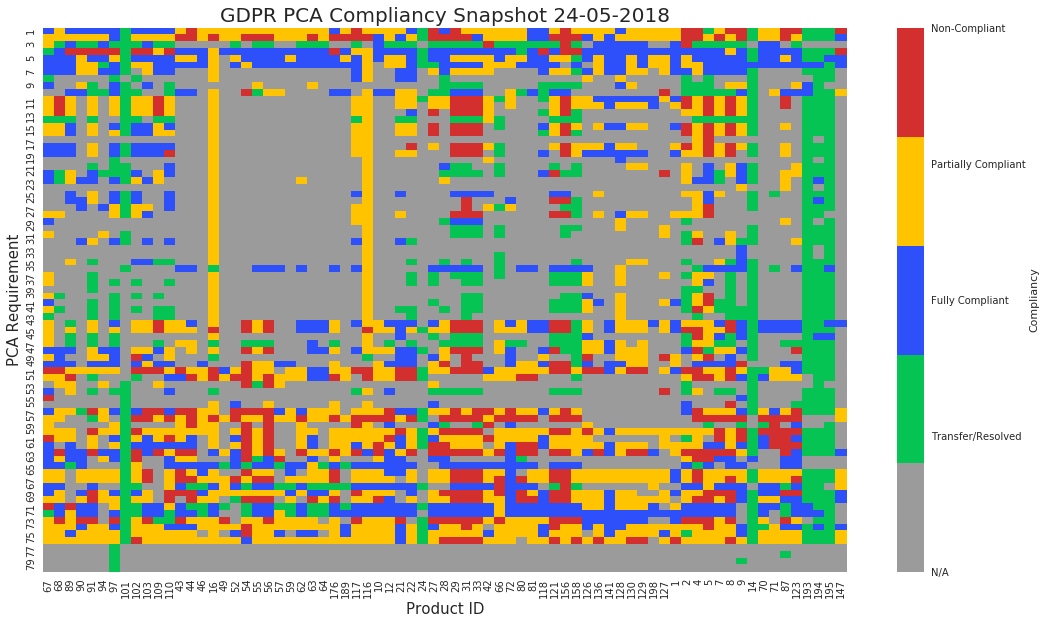

In [337]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])
zx = sns.heatmap(pca_rollup_target, ax=ax, square=False, cmap=cmap, yticklabels='auto', cbar_kws={"orientation": "vertical","label": "Compliancy"})
title = "GDPR PCA Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Compliancy-Heatmap-"+today+".png")

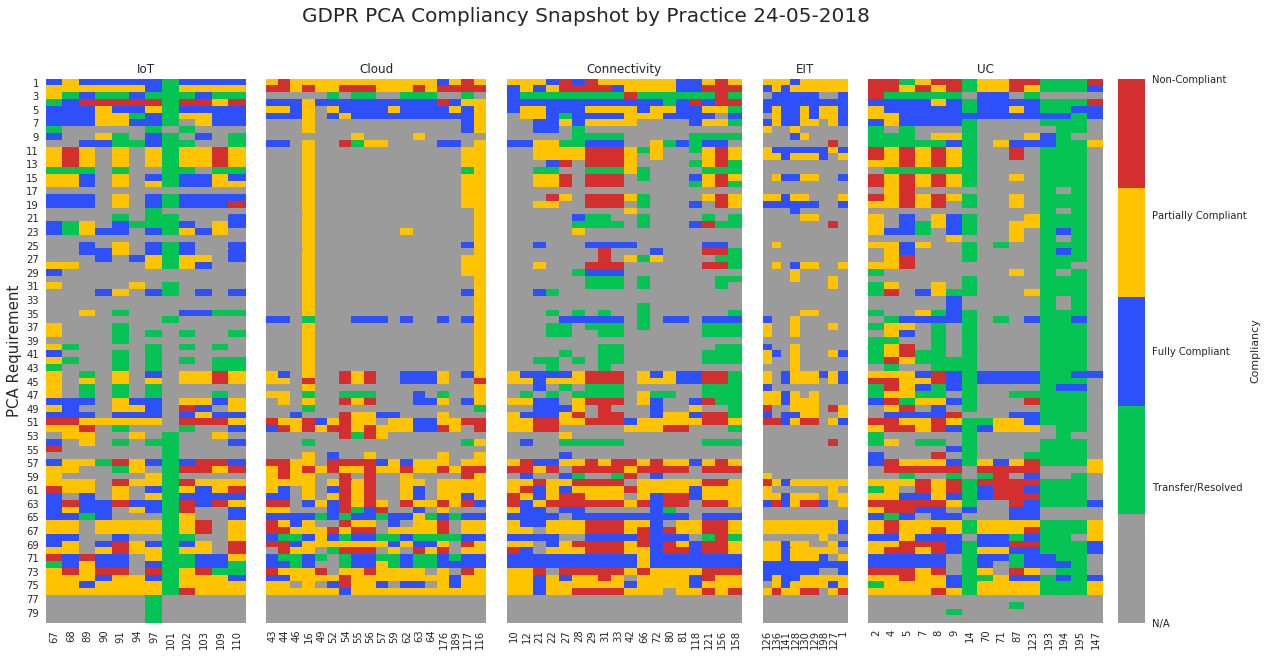

In [338]:
# create subplots
pca_rollup_target.columns.name = ""

baseline_iot_heatmap = pca_rollup_target[iot_cols]
baseline_cloud_heatmap = pca_rollup_target[cloud_cols]
baseline_connectivity_heatmap = pca_rollup_target[connectivity_cols]
baseline_eit_heatmap = pca_rollup_target[eit_cols]
baseline_uc_heatmap = pca_rollup_target[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#cmap=mcolors.ListedColormap(['#9B9B9B',
#                             '#06C454',
#                             '#2E50FB',
#                             '#FFC300',
#                             '#C70039'])
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])


title = "GDPR PCA Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(baseline_iot_heatmap, ax=ax, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(baseline_cloud_heatmap, ax=ax1, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(baseline_connectivity_heatmap, ax=ax2, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(baseline_eit_heatmap, ax=ax3, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(baseline_uc_heatmap, ax=ax4, square=False, vmin=1, vmax=5, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Per-Practice-Heatmap-"+today+".png")

In [339]:
input_heatmap.fillna(1,inplace=True)
input_heatmap
output_writer = pd.ExcelWriter('./dump.xlsx')
input_heatmap.to_excel(output_writer, 'heatmap')
output_writer.save()

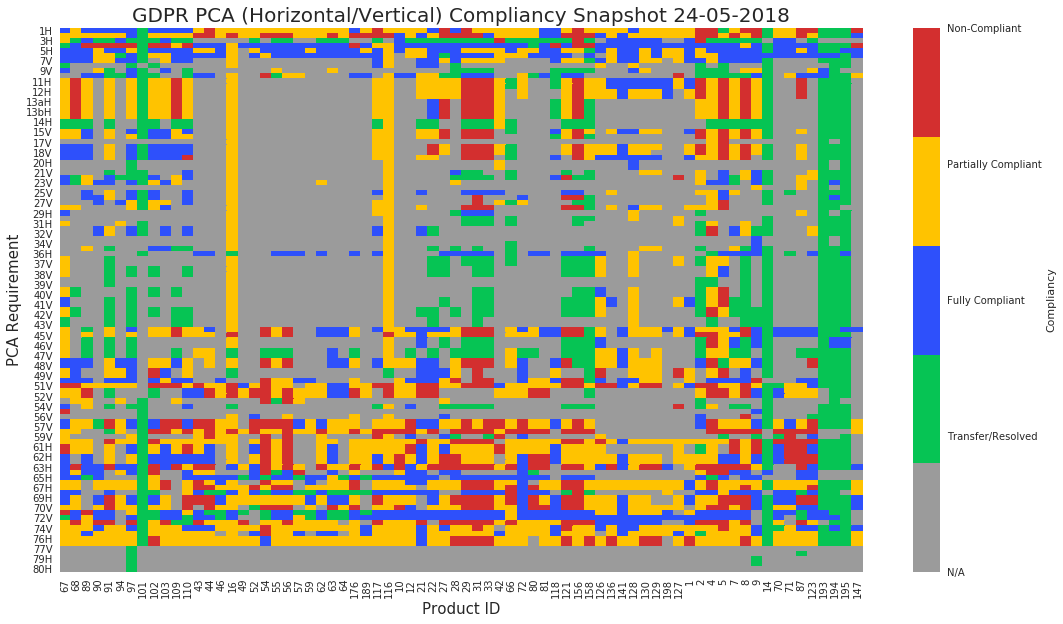

In [340]:
f, ax = plt.subplots(figsize=(18, 10))
#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])

zx = sns.heatmap(input_heatmap, ax=ax, square=False, vmin=1, vmax=5, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"})
title = "GDPR PCA (Horizontal/Vertical) Compliancy Snapshot "+today
plt.title(title, size=20)
plt.xlabel('Product ID', size=15)
plt.ylabel('PCA Requirement', size=15)
cbar = zx.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Compliancy-Heatmap-"+today+".png")

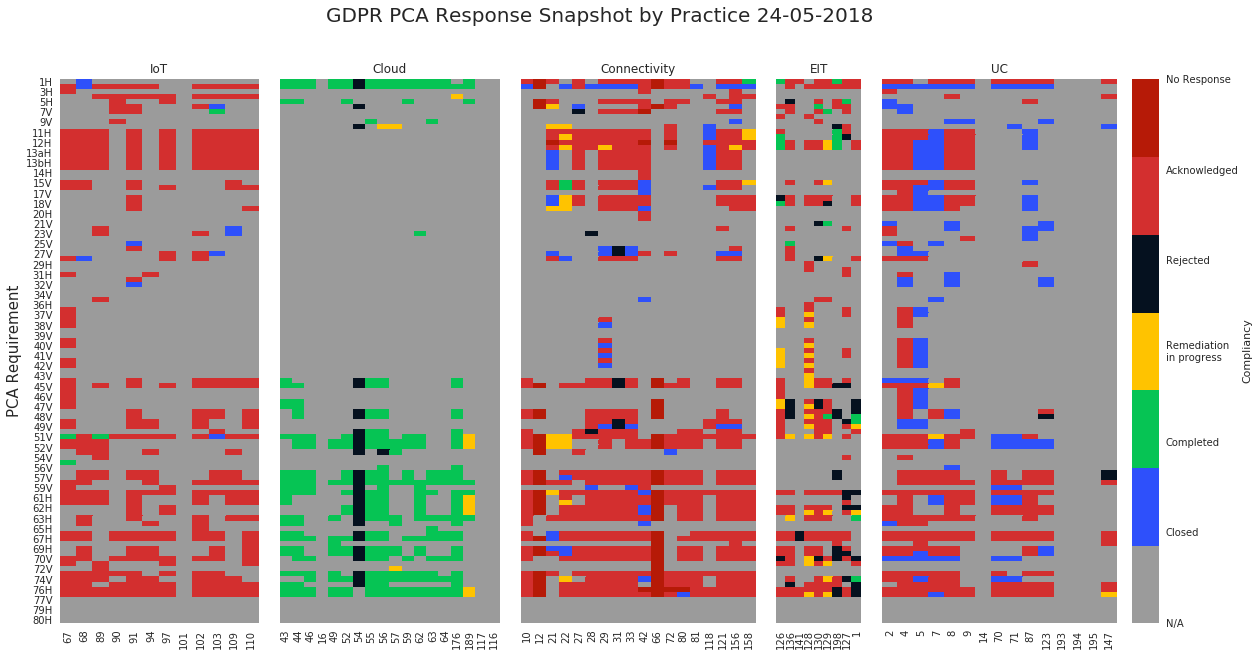

In [341]:
baseline_iot_heatmap = response_heatmap[iot_cols]
baseline_cloud_heatmap = response_heatmap[cloud_cols]
baseline_connectivity_heatmap = response_heatmap[connectivity_cols]
baseline_eit_heatmap = response_heatmap[eit_cols]
baseline_uc_heatmap = response_heatmap[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

BLACK = '#05111F'
DARKRED = '#B61A07'

cmap=mcolors.ListedColormap([GREY,
                             BLUE,
                             GREEN,
                             AMBER,
                             BLACK,
                             RED,
                             DARKRED])


title = "GDPR PCA Response Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(baseline_iot_heatmap, ax=ax, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(baseline_cloud_heatmap, ax=ax1, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(baseline_connectivity_heatmap, ax=ax2, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(baseline_eit_heatmap, ax=ax3, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(baseline_uc_heatmap, ax=ax4, square=False, vmin=0, vmax=6, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(['N/A',
                     'Closed',
                     'Completed',
                     'Remediation \nin progress',
                     'Rejected',
                     'Acknowledged',
                     'No Response'])

f.savefig(OUTPUT_BASE_DIR+"/PCA-Response-Heatmap-"+today+".png")

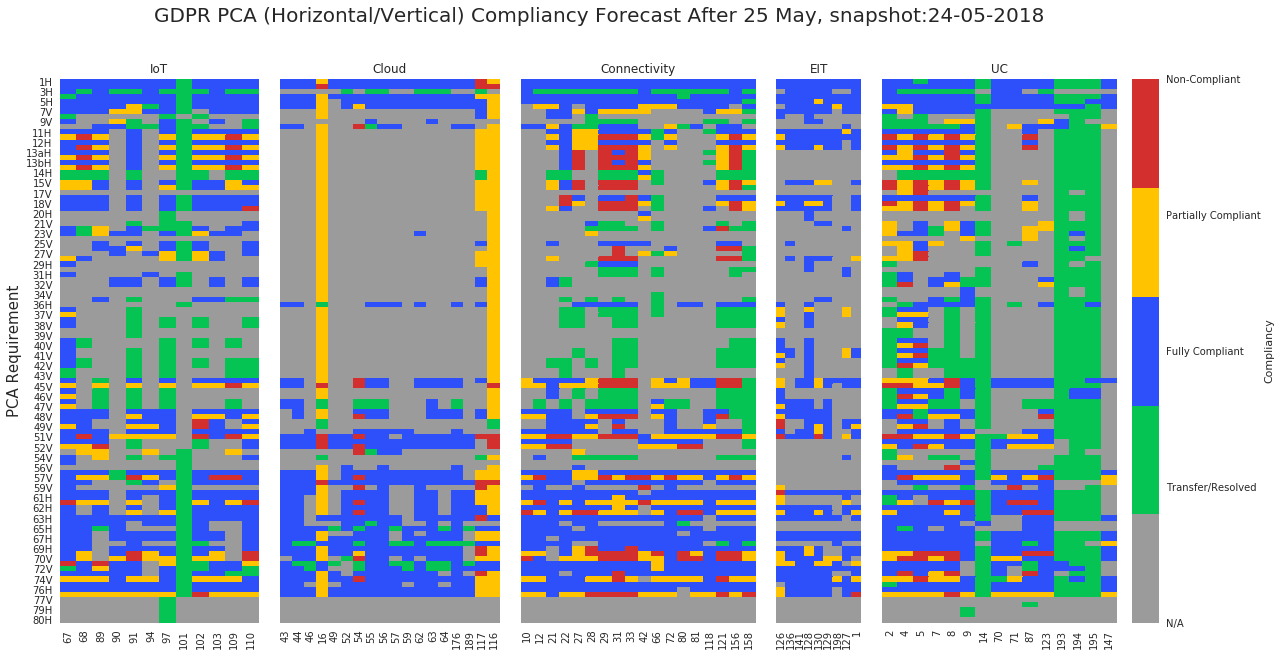

In [342]:
forcast_heatmap.fillna(1,inplace=True)

baseline_iot_heatmap = forcast_heatmap[iot_cols]
baseline_cloud_heatmap = forcast_heatmap[cloud_cols]
baseline_connectivity_heatmap = forcast_heatmap[connectivity_cols]
baseline_eit_heatmap = forcast_heatmap[eit_cols]
baseline_uc_heatmap = forcast_heatmap[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

BLACK = '#05111F'
DARKRED = '#B61A07'

#f.colorbar
cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])


title = "GDPR PCA (Horizontal/Vertical) Compliancy Forecast After 25 May, snapshot:"+today
f.suptitle(title, size=20)


zx = sns.heatmap(baseline_iot_heatmap, ax=ax, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(baseline_cloud_heatmap, ax=ax1, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(baseline_connectivity_heatmap, ax=ax2, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(baseline_eit_heatmap, ax=ax3, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(baseline_uc_heatmap, ax=ax4, square=False, vmin=1, vmax=5, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')


#plt.ylabel('PCA Requirement', size=15)
cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Compliancy-Forecast-Heatmap-"+today+".png")

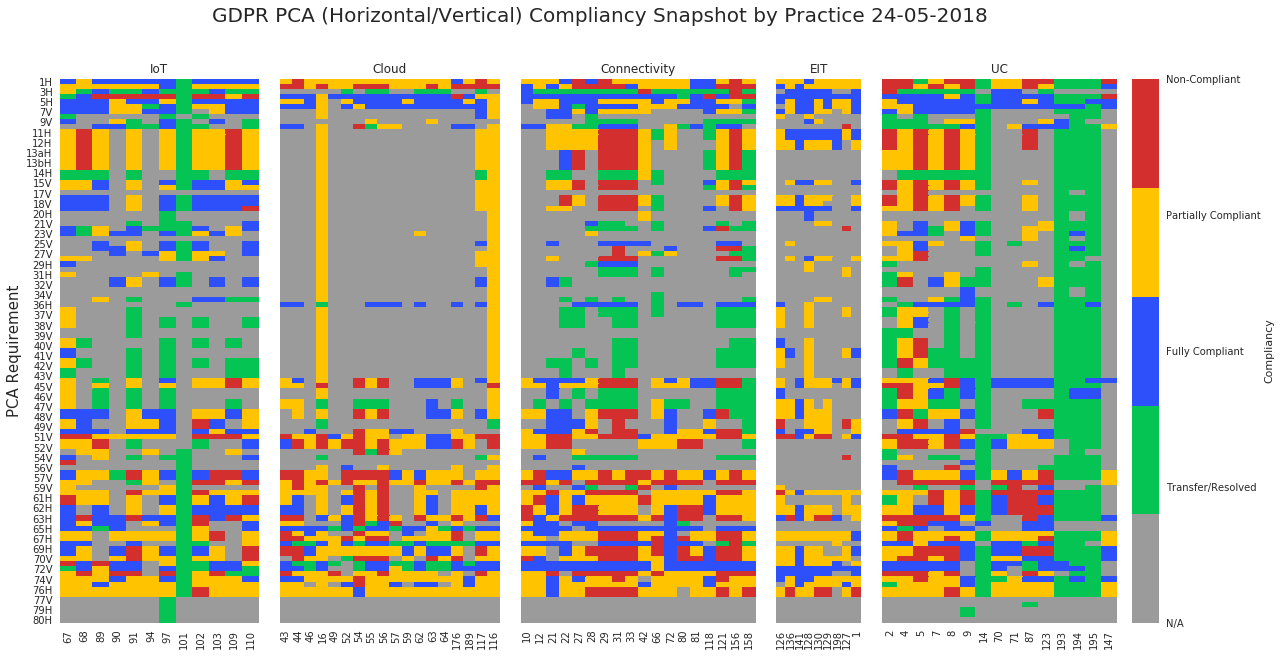

In [343]:
# create subplots
iot_heatmap = input_heatmap[iot_cols]
cloud_heatmap = input_heatmap[cloud_cols]
connectivity_heatmap = input_heatmap[connectivity_cols]
eit_heatmap = input_heatmap[eit_cols]
uc_heatmap = input_heatmap[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.29,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

cmap=mcolors.ListedColormap([GREY,
                             GREEN,
                             BLUE,
                             AMBER,
                             RED])

title = "GDPR PCA (Horizontal/Vertical) Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_heatmap, ax=ax, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)
#zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False)
ax.set_title('IoT')
ax.set_ylabel('PCA Requirement', size=15)

zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_heatmap, ax=ax2, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_heatmap, ax=ax3, square=False, vmin=1, vmax=5, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')


zx4 = sns.heatmap(uc_heatmap, ax=ax4, square=False, vmin=1, vmax=5, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"}, xticklabels=True)
ax4.set_title('UC')


#plt.annotate('Something', (0,0))
#plt.xlabel('Product ID', size=15)
#plt.ylabel('PCA Requirement', size=15)

cbar = zx4.collections[0].colorbar
cbar.set_ticks([1, 2, 3, 4, 5])
cbar.set_ticklabels(['N/A',
                     'Transfer/Resolved',
                     'Fully Compliant', 
                     'Partially Compliant', 
                     'Non-Compliant'])

#f.tight_layout(rect=[0, 0, 0.9, 0.9])

#cbar = zx1.collections[0].colorbar
#cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
#cbar.set_ticklabels(['0:Out of Scope from DPIA',
#                     '1:N/A', 
#                     '2:Fully Compliant', 
#                     '3:Partially Compliant f',
#                     '4:Partially Compliant', 
#                     '5:Non-Compliant f', 
#                     '6:Non-Compliant'])

f.savefig(OUTPUT_BASE_DIR+"/HV-Breakdown-Per-Practice-Heatmap-"+today+".png")

In [344]:
# create burndowns
pca_df.head()

gap_counter = set([

    'PARTIALLY COMPLIANT ',
    'NON-COMPLIANT ',
    'PARTIALLY COMPLIANT f',
    'NON-COMPLIANT',
    'NON-COMPLIANT f',
    'PARTIALLY COMPLIANT']
)


#burndown_df = pd.DataFrame(index=['IoT','Cloud','Connectivity','EIT','UC', 'Total'], columns=[week_num])

#output_writer = pd.ExcelWriter('./burndown.xlsx')
#burndown_df.to_excel(output_writer, 'PCA Burndown')
#output_writer.save()


In [345]:
#start_date = datetime.today()
#end_date = date(2018,6,1)


#end_date.strftime('%d-%m-%Y')
#end_date = end_date + timedelta(days=7)
#end_date.strftime('%d-%m-%Y')

In [346]:
#start_date.strftime('%Y Week %W')

In [347]:
iot_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='IoT'].value_counts()
cloud_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='Cloud'].value_counts()
connectivity_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='Connectivity'].value_counts()
eit_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='EIT'].value_counts()
uc_compliance = pca_df['Compliance Assessment'][pca_df['Practice']=='UC'].value_counts()

In [348]:
iot_compliance

PARTIALLY COMPLIANT      768
NON-COMPLIANT            225
PARTIALLY COMPLIANT f    145
Name: Compliance Assessment, dtype: int64

In [349]:
iot_gap = 0
cloud_gap = 0
connectivity_gap = 0
eit_gap = 0
uc_gap = 0

for key in iot_compliance.keys():
    if key in gap_counter:
        iot_gap = iot_gap + iot_compliance[key]

for key in cloud_compliance.keys():
    if key in gap_counter:
        cloud_gap = cloud_gap + cloud_compliance[key]

for key in connectivity_compliance.keys():
    if key in gap_counter:
        connectivity_gap = connectivity_gap + connectivity_compliance[key]

for key in eit_compliance.keys():
    if key in gap_counter:
        eit_gap = eit_gap + eit_compliance[key]

for key in uc_compliance.keys():
    if key in gap_counter:
        uc_gap = uc_gap + uc_compliance[key]

total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap
print total_gap

5190


In [350]:
response_stats = response_heatmap.apply(pd.Series.value_counts)
response_stats.fillna(0,inplace=True)

In [351]:
response_stats['Total'] = 0

for i in response_stats.index:
    response_stats.loc[i,'Total'] = response_stats.loc[i].sum()

response_stats['Response'] = ['N/A',
                             'Closed',
                             'Completed',
                             'Remediation in progress',
                             'Rejected',
                             'Acknowledged',
                             'No Response']

total_outstanding = response_stats.iloc[3:]['Total'].sum()


response_stats

,67,68,89,90,91,94,97,101,102,103,...,70,71,87,123,193,194,195,147,Total,Response
0,59.0,72.0,77.0,93.0,61.0,86.0,80.0,107.0,71.0,74.0,...,85.0,87.0,72.0,82.0,107.0,107.0,107.0,95.0,5706.0,N/A
1,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,...,9.0,10.0,14.0,10.0,0.0,0.0,0.0,1.0,203.0,Closed
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,302.0,Completed
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76.0,Remediation in progress
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,89.0,Rejected
5,46.0,32.0,29.0,14.0,44.0,21.0,27.0,0.0,36.0,29.0,...,13.0,10.0,21.0,14.0,0.0,0.0,0.0,8.0,1260.0,Acknowledged
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,No Response


In [352]:
response_stats.iloc[3:]['Total']

3      76.0
4      89.0
5    1260.0
6      68.0
Name: Total, dtype: float64

In [353]:
cloud_cols

[43, 44, 46, 16, 49, 52, 54, 55, 56, 57, 59, 62, 63, 64, 176, 189, 117, 116]

In [354]:
connectivity_cols

[10, 12, 21, 22, 27, 28, 29, 31, 33, 42, 66, 72, 80, 81, 118, 121, 156, 158]

In [355]:
eit_cols

[126, 136, 141, 128, 130, 129, 198, 127, 1]

In [356]:
uc_cols

[2, 4, 5, 7, 8, 9, 14, 70, 71, 87, 123, 193, 194, 195, 147]

In [357]:
response_stats.drop(index=[0,1,2], inplace=True)
response_stats

,67,68,89,90,91,94,97,101,102,103,...,70,71,87,123,193,194,195,147,Total,Response
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,76.0,Remediation in progress
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,89.0,Rejected
5,46.0,32.0,29.0,14.0,44.0,21.0,27.0,0.0,36.0,29.0,...,13.0,10.0,21.0,14.0,0.0,0.0,0.0,8.0,1260.0,Acknowledged
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,No Response


In [358]:
iot_response_stats = response_stats[iot_cols].copy()
iot_response_stats['Total'] = 0
for i in iot_response_stats.index:
    iot_response_stats.loc[i,'Total'] = iot_response_stats.loc[i].sum()

cloud_response_stats = response_stats[cloud_cols].copy()
cloud_response_stats['Total'] = 0
for i in cloud_response_stats.index:
    cloud_response_stats.loc[i,'Total'] = cloud_response_stats.loc[i].sum()

connectivity_response_stats = response_stats[connectivity_cols].copy()
connectivity_response_stats['Total'] = 0
for i in connectivity_response_stats.index:
    connectivity_response_stats.loc[i,'Total'] = connectivity_response_stats.loc[i].sum()

eit_response_stats = response_stats[eit_cols].copy()
eit_response_stats['Total'] = 0
for i in eit_response_stats.index:
    eit_response_stats.loc[i,'Total'] = eit_response_stats.loc[i].sum()

uc_response_stats = response_stats[uc_cols].copy()
uc_response_stats['Total'] = 0
for i in uc_response_stats.index:
    uc_response_stats.loc[i,'Total'] = uc_response_stats.loc[i].sum()
    
iot_outstanding = iot_response_stats['Total'].sum()
cloud_outstanding = cloud_response_stats['Total'].sum()
connectivity_outstanding = connectivity_response_stats['Total'].sum()
eit_outstanding = eit_response_stats['Total'].sum()
uc_outstanding = uc_response_stats['Total'].sum()

print iot_outstanding
print cloud_outstanding
print connectivity_outstanding
print eit_outstanding
print uc_outstanding

print iot_outstanding+cloud_outstanding+connectivity_outstanding+eit_outstanding+uc_outstanding

339.0
46.0
587.0
256.0
265.0
1493.0


In [359]:
#response_stats.iloc[3:]['Total'].sum()
# only want to plot 3,4,5, and 6



total_outstanding

1493.0

In [360]:
#burndown_df.head()

pca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Burndown')
rolled_up_pca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Burndown Rolled Up')
sca_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='SCA Burndown')
pca_status_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='PCA Status Burndown')
sca_status_burndown_df = pd.read_excel('./burndown.xlsx', sheet_name='SCA Status Burndown')

pca_burndown_df.columns.name = 'Week #'
pca_status_burndown_df.head(10)

,2018 Week 18,2018 Week 19,2018 Week 20,2018 Week 21
IoT,NaN,373,339,339
Cloud,NaN,206,201,46
Connectivity,NaN,573,593,587
EIT,NaN,260,226,256
UC,NaN,713,308,265
Total,2422.0,2125,1667,1493


In [361]:
pca_status_burndown_df[week_num] = [iot_outstanding, cloud_outstanding, 
                                    connectivity_outstanding, eit_outstanding, 
                                    uc_outstanding, total_outstanding]
pca_status_burndown_df.head(6)

,2018 Week 18,2018 Week 19,2018 Week 20,2018 Week 21
IoT,NaN,373,339,339.0
Cloud,NaN,206,201,46.0
Connectivity,NaN,573,593,587.0
EIT,NaN,260,226,256.0
UC,NaN,713,308,265.0
Total,2422.0,2125,1667,1493.0


In [362]:
pca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
pca_burndown_df[week_num]['Total']

5190

In [363]:
list(pca_burndown_df.loc['Total'])

[5706, 5768, 5376, 5190]

In [364]:
pca_burndown_df.head(10)


Week #,2018 Week 18,2018 Week 19,2018 Week 20,2018 Week 21
IoT,1165,1165,1138,1138
Cloud,579,579,579,366
Connectivity,2000,1976,1987,1982
EIT,300,300,267,299
UC,1662,1748,1405,1405
Total,5706,5768,5376,5190


In [365]:
pca_rollup_target[27].value_counts()

1    36
4    16
3    12
5     8
2     8
Name: 27, dtype: int64

In [366]:
pca_rollup_target.replace(to_replace=1, value=PCA_COMPLIANCE_INVERSE.get(1), inplace=True)
pca_rollup_target.replace(to_replace=2, value=PCA_COMPLIANCE_INVERSE.get(2), inplace=True)
pca_rollup_target.replace(to_replace=3, value=PCA_COMPLIANCE_INVERSE.get(3), inplace=True)
pca_rollup_target.replace(to_replace=4, value=PCA_COMPLIANCE_INVERSE.get(4), inplace=True)
pca_rollup_target.replace(to_replace=5, value=PCA_COMPLIANCE_INVERSE.get(5), inplace=True)

In [367]:
new_compliancy_stats = pca_rollup_target.apply(pd.Series.value_counts)
new_compliancy_stats[27]

FULLY COMPLIANT        12
N/A                    36
NON-COMPLIANT           8
PARTIALLY COMPLIANT    16
RESOLVED/TRANSFERED     8
Name: 27, dtype: int64

In [368]:
new_compliancy_stats.fillna(0, inplace=True)
new_compliancy_stats['Total'] = 0
new_compliancy_stats.loc['FULLY COMPLIANT', 'Total'] = new_compliancy_stats.loc['FULLY COMPLIANT'].sum()
new_compliancy_stats.loc['N/A', 'Total'] = new_compliancy_stats.loc['N/A'].sum()
new_compliancy_stats.loc['NON-COMPLIANT', 'Total'] = new_compliancy_stats.loc['NON-COMPLIANT'].sum()
new_compliancy_stats.loc['PARTIALLY COMPLIANT', 'Total'] = new_compliancy_stats.loc['PARTIALLY COMPLIANT'].sum()
new_compliancy_stats.loc['RESOLVED/TRANSFERED', 'Total'] = new_compliancy_stats.loc['RESOLVED/TRANSFERED'].sum()

iot_burndown_stats = new_compliancy_stats[iot_cols]
cloud_burndown_stats = new_compliancy_stats[cloud_cols]
connectivity_burndown_stats = new_compliancy_stats[connectivity_cols]
eit_burndown_stats = new_compliancy_stats[eit_cols]
uc_burndown_stats = new_compliancy_stats[uc_cols]


#for c in new_compliancy_stats.columns:
#    new_compliancy_stats.loc['Total',c] = new_compliancy_stats[c].sum()

#new_compliancy_stats.loc['Total','Total'] = new_compliancy_stats['Total'].sum()

new_compliancy_stats

,67,68,89,90,91,94,97,101,102,103,...,14,70,71,87,123,193,194,195,147,Total
FULLY COMPLIANT,21,13,18,13,8,8,24,0.0,14,18.0,...,2.0,13,10,10,19,5.0,6.0,4.0,8.0,783.0
N/A,21,36,36,52,23,52,19,29.0,28,38.0,...,17.0,53,52,39,40,13.0,15.0,12.0,62.0,2813.0
NON-COMPLIANT,4,6,3,2,7,1,2,0.0,8,7.0,...,0.0,2,5,11,8,0.0,0.0,0.0,2.0,459.0
PARTIALLY COMPLIANT,29,19,18,11,25,16,18,0.0,19,17.0,...,0.0,9,11,15,10,0.0,0.0,0.0,8.0,1095.0
RESOLVED/TRANSFERED,5,6,5,2,17,3,17,51.0,11,0.0,...,61.0,3,2,5,3,62.0,59.0,64.0,0.0,690.0


In [369]:
rolled_up_pca_burndown_df

,2018 Week 3,2018 Week 16,2018 Week 18,2018 Week 19,2018 Week 20,2018 Week 21
IoT,0,0,257,257,257,257
Cloud,0,0,407,407,407,407
Connectivity,0,0,428,428,428,425
EIT,0,0,188,188,188,187
UC,0,0,278,278,278,278
Total,2173,1687,1558,1558,1558,1554


In [370]:
iot_gap = iot_burndown_stats.loc['NON-COMPLIANT'].sum() + iot_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
cloud_gap = cloud_burndown_stats.loc['NON-COMPLIANT'].sum() + cloud_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
connectivity_gap = connectivity_burndown_stats.loc['NON-COMPLIANT'].sum() + connectivity_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
eit_gap = eit_burndown_stats.loc['NON-COMPLIANT'].sum() + eit_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()
uc_gap = uc_burndown_stats.loc['NON-COMPLIANT'].sum() + uc_burndown_stats.loc['PARTIALLY COMPLIANT'].sum()

total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap

rolled_up_pca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
rolled_up_pca_burndown_df[week_num]['Total']

rolled_up_pca_burndown_df.fillna(0,inplace=True)

#rolled_up_pca_burndown_df.index.name = "Practice"
#rolled_up_pca_burndown_df.columns.name = "Wk#"

rolled_up_pca_burndown_df


,2018 Week 3,2018 Week 16,2018 Week 18,2018 Week 19,2018 Week 20,2018 Week 21
IoT,0,0,257,257,257,257.0
Cloud,0,0,407,407,407,407.0
Connectivity,0,0,428,428,428,425.0
EIT,0,0,188,188,188,187.0
UC,0,0,278,278,278,278.0
Total,2173,1687,1558,1558,1558,1554.0


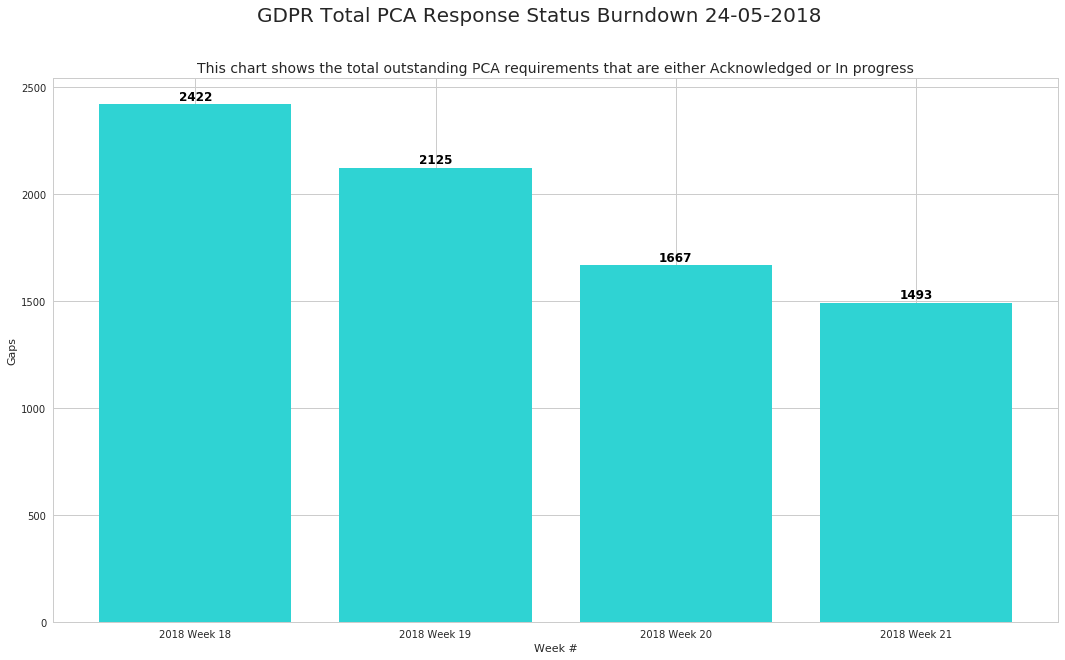

In [371]:
f, ax = plt.subplots(figsize=(18, 10))
bars = list(pca_status_burndown_df.loc['Total'])
xticks = list(pca_status_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color='#2FD3D3')

for a,b in zip(x, bars):
    plt.text(a, b+20, str(int(b)), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.suptitle("GDPR Total PCA Response Status Burndown "+today, size=20)
plt.title("This chart shows the total outstanding PCA requirements that are either Acknowledged or In progress", size=14)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Response-Status-Burndown-"+today+".png")




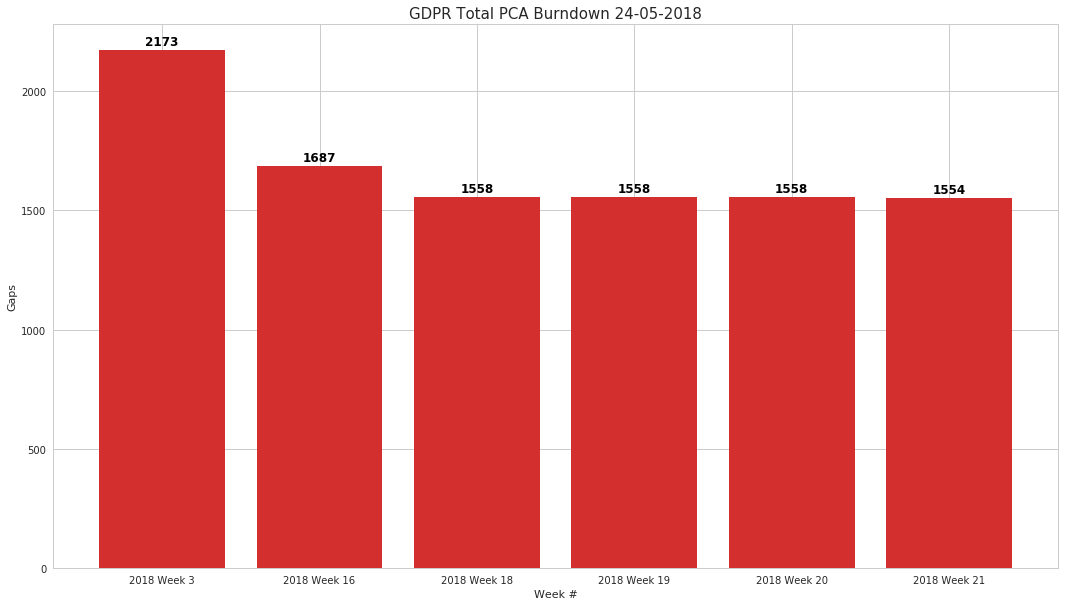

In [372]:
f, ax = plt.subplots(figsize=(18, 10))
bars = list(rolled_up_pca_burndown_df.loc['Total'])
xticks = list(rolled_up_pca_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color=RED)

for a,b in zip(x, bars):
    plt.text(a, b+20, str(int(b)), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.title("GDPR Total PCA Burndown "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Burndown-"+today+".png")

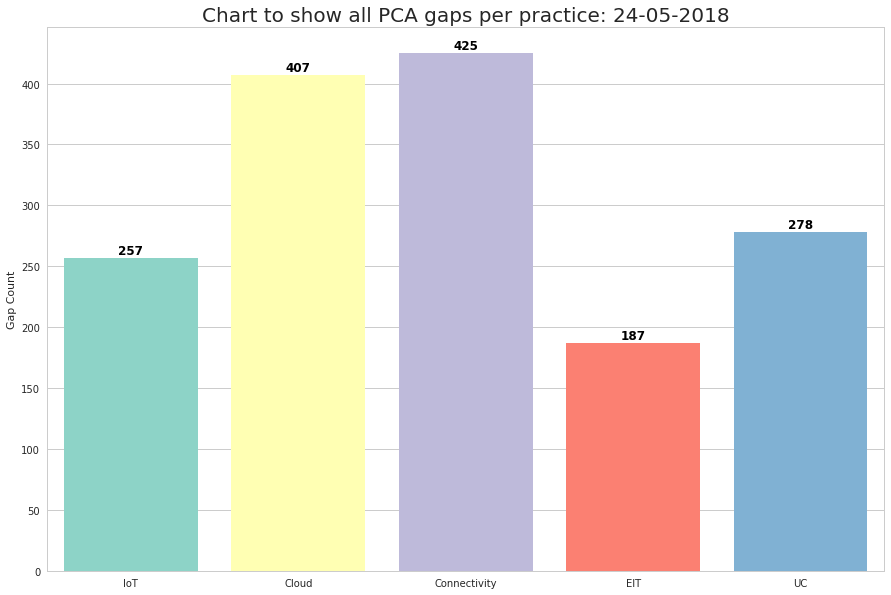

In [373]:
fig, ax = plt.subplots(figsize=(15,10))

x = ['IoT', 'Cloud', 'Connectivity', 'EIT', 'UC']
y = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap]

sns.barplot(x=x, y=y, saturation=1, palette='Set3')

# add values on top of bars
font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0}'.format(int(y[i])),
            ha="center", fontdict=font)
    i = i+1

ax.set_ylabel("Gap Count")
#ax.set_xlabel(today)
ax.set_title("Chart to show all PCA gaps per practice: "+today, size=20)
fig.savefig(OUTPUT_BASE_DIR+"/PCA-Burndown-Per-Practice-"+today+".png")

In [374]:
sca_heatmap_df.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation


In [375]:
sca_forcast_heatmap = sca_heatmap_df.copy()
sca_forcast_heatmap.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.2,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.3,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,4 - Broadly adequate / Observation,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,0 - n/a,4 - Broadly adequate / Observation
9.2.5,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation,4 - Broadly adequate / Observation,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation
9.2.6-A,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,0 - n/a,3 - Partially adequate / Minor Non-Conformity ...,3 - Partially adequate / Minor Non-Conformity ...,...,2 - Inadequate / Minor Non-Conformity (high se...,4 - Broadly adequate / Observation,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,0 - n/a,2 - Inadequate / Minor Non-Conformity (high se...,0 - n/a,4 - Broadly adequate / Observation,0 - n/a,4 - Broadly adequate / Observation


In [376]:
#output_writer = pd.ExcelWriter('./burndown.xlsx')
#burndown_df.to_excel(output_writer, 'PCA Burndown')
#output_writer.save()
sca_forcast_heatmap.replace(to_replace=list(SCA_COMPLIANCE.keys()), value=list(SCA_COMPLIANCE.values()), inplace=True)
#sca_forcast_heatmap.replace(to_replace=[1,2,3,4,5], value=[6,6,6,6,6], inplace=True)
sca_forcast_heatmap.head()

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3,3,3,0,3,4,4,0,4,4,...,0,4,3,4,0,3,0,4,0,4
9.2.2,3,3,3,0,3,4,4,0,4,4,...,3,0,0,0,0,0,0,0,0,4
9.2.3,3,3,3,0,2,4,4,0,4,4,...,4,0,0,0,0,0,0,0,0,4
9.2.5,3,3,3,0,2,4,4,0,4,4,...,2,4,3,0,4,3,0,4,0,4
9.2.6-A,3,3,3,0,2,3,3,0,3,3,...,2,4,2,0,0,2,0,4,0,4


# SCA Heatmap Data

In [377]:
for p in COLS:
    prod_filter = sca_df['Product ID'] == p
    prod_df = sca_df[prod_filter].copy()
    
    for r in prod_df['Req Ref']:
        if p == 193:
            sca = r[12:-2]
        else:
            sca = r[11:-2]

            
        print p
        #if p == 101:
            #print sca
            #print prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            #print sca_heatmap_df.loc[sca][p]
        
        if sca in SCA_INDEX:
            compliance_value = SCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)
            
            response_value = RESPONSE_TYPES.get(prod_df[prod_df['Req Ref'] == r]['Response'].iloc[0], 10)
            
            forecast_value = SCA_COMPLIANCE.get(sca_forcast_heatmap_df[sca_forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)

            if p == 193:
                if sca == '9.4.2':
                    print compliance_value
                    print forecast_value
                    print SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0)
                    print sca_forcast_heatmap.loc[sca,p]
            
            if SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) == 0:
                sca_forcast_heatmap.loc[sca,p] = SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0)
            elif ((forecast_value < compliance_value) or (compliance_value == 0)):
                sca_forcast_heatmap.loc[sca,p] = compliance_value
            else:
                sca_forcast_heatmap.loc[sca,p] = forecast_value
            
            # collect a heatmap for responses.
            response_value = RESPONSE_TYPES.get(prod_df[prod_df['Req Ref'] == r]['Response'].iloc[0], 0)
            #print response_value
            if ((compliance_value == 0) or 
                (compliance_value == 4) or 
                (compliance_value == 5) or 
                (compliance_value == 6)):
                sca_response_heatmap_df.loc[sca][p] = 0
            elif response_value < RESPONSE_TYPES.get(sca_response_heatmap_df.loc[sca][p], 10):
                #print 'AB: update response heatmap'
                sca_response_heatmap_df.loc[sca][p] = response_value
            
            #if response_value < sca_response_heatmap_df.loc[sca][p]:
            #    sca_response_heatmap_df.loc[sca,p] = response_value

            if ((SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) < compliance_value) and 
                (SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) != 6) and 
                (SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) != 5) and 
                (SCA_COMPLIANCE.get(sca_heatmap_df.loc[sca][p], 0) != 0)):
                sca_heatmap_df.loc[sca,p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
            else:
                print("2: Compliance Value: {0:s}".format(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]))
                print("2: Heatmap Value: {0}".format(sca_heatmap_df.loc[sca][p]))
                #sys.exit("EXIT")
            
            #print r
            #print heatmap_df.loc[r][p]
        else:
            if sca in converter.keys():
                print "not in index"
                sca_heatmap_df.loc[converter.get(sca)][p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                if response_value < sca_response_heatmap_df.loc[sca][p]:
                    sca_response_heatmap_df.loc[sca,p] = response_value
                    
                
                forecast_value = SCA_COMPLIANCE.get(sca_forcast_heatmap_df[sca_forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)

                if ((forecast_value < compliance_value) or (compliance_value == 0)):
                    sca_forcast_heatmap.loc[sca,p] = compliance_value
                else:
                    sca_forcast_heatmap.loc[sca,p] = forecast_value

            else:
                print("Req nr not in index: {0}".format(r))
                if sca == 13:
                    sca_heatmap_df.loc['13aV',p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
                    sca_heatmap_df.loc['13bV',p] = prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0]
 
                compliance_value = SCA_COMPLIANCE.get(prod_df[prod_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)

                if response_value < sca_response_heatmap_df.loc[sca][p]:
                    sca_response_heatmap_df.loc[sca,p] = response_value
                    
                forecast_value = SCA_COMPLIANCE.get(sca_forcast_heatmap_df[sca_forcast_heatmap_df['Req Ref'] == r]['Compliance Assessment'].iloc[0], 10)

                if ((forecast_value < compliance_value) or (compliance_value == 0)):
                    sca_forcast_heatmap.loc[sca,p] = compliance_value
                else:
                    sca_forcast_heatmap.loc[sca,p] = forecast_value
                    
            

67
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
67
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
67
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
67
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
67
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
67
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
67
2: Compliance Value: 3 - Pa

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
68
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
68
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
68
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
68
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
68
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
68
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non

2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
91
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
91
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
91
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
91
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
91
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
91
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
103
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
103
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
103
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
103
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
103
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
103
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
103
2: Compliance Value: 3 - Partially adequate / Minor N

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
43
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
43
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
43
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
43
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
43
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
43
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
43
2: Complianc

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
62
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
62
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
63
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
63
2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
63
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
63
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
63
2: Compliance Value:

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
12
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
12
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
21
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
21
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
21
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
21
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
21
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
21
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observa

2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
29
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
29
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
29
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
29
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
29
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
29
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
29
2: Compliance Value: 4

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
31
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
31
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
33
2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
33
2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
33
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
33
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
33
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate 

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
80
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
80
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
80
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
80
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
80
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
80
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
80
2: Compl

2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
121
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
121
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
121
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
121
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
121
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
121
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adeq

2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
158
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
158
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
158
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
158
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
158
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
158
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity

127
2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
127
2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
127
2: Compliance Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
2: Heatmap Value: 3 - Partially adequate / Minor Non-Conformity (low severity)
1
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
1
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
1
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
1
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
1
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
1
2: Compliance Value:

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
2
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
2
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
2
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
2
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
2
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
4
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
4
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
4
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
8
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
8
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
8
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
8
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
8
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
8
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
8
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation
8
2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 

2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
9
2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
9
2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
9
2: Compliance Value: 1 - Very Inadequate / Major Non-Conformity
2: Heatmap Value: 1 - Very Inadequate / Major Non-Conformity
9
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
9
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
9
2: Compliance Value: 2 - Inadequate / Minor Non-Conformity (high severity)
2: Heatmap Value: 2 - Inadequate / Minor Non-Conformity (high severity)
9
2: Compliance Value: 3 - Partially adequate /

2: Compliance Value: 4 - Broadly adequate / Observation
2: Heatmap Value: 4 - Broadly adequate / Observation


In [378]:
sca_forcast_heatmap_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
12,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.1-A-A,9.2.1-A,Acknowledged,NaN,EPS147-SCA-9.2.1-A,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
13,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.2-A,9.2.2,Acknowledged,NaN,EPS147-SCA-9.2.2,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
14,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.3-A,9.2.3,Acknowledged,NaN,EPS147-SCA-9.2.3,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
15,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.5-A,9.2.5,Acknowledged,NaN,EPS147-SCA-9.2.5,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
16,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.6-A-A,9.2.6-A,Acknowledged,NaN,EPS147-SCA-9.2.6-A,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN


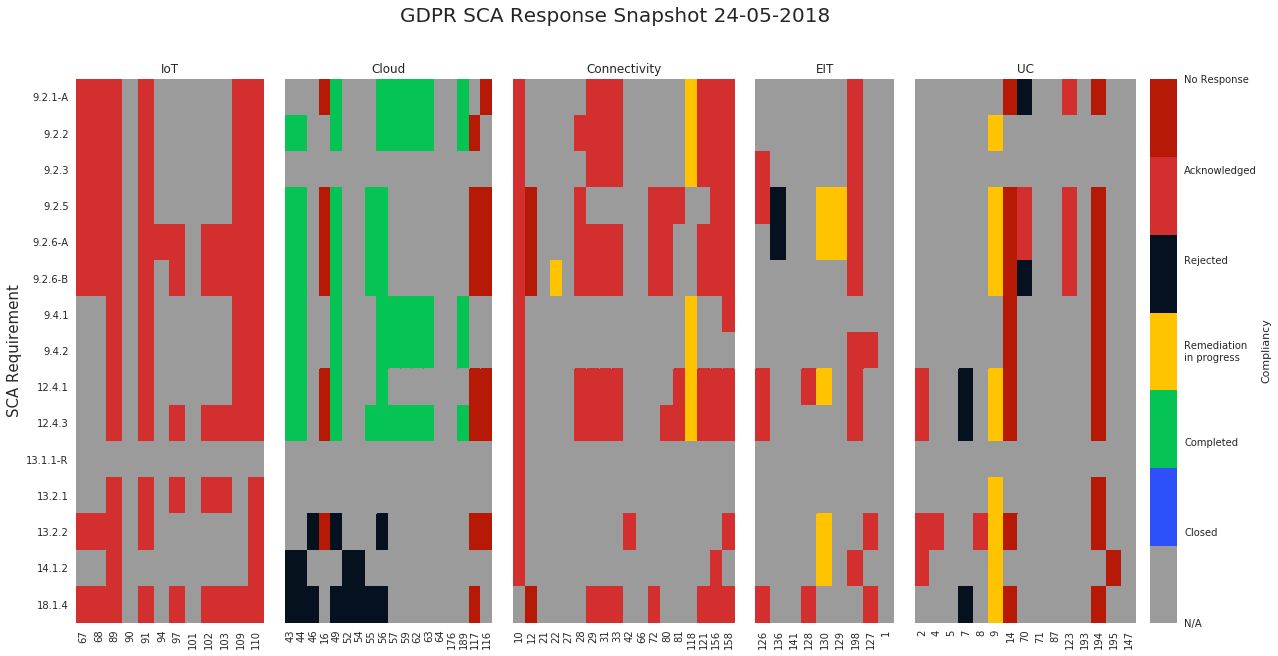

In [379]:
# create subplots
iot_heatmap = sca_response_heatmap_df[iot_cols]
cloud_heatmap = sca_response_heatmap_df[cloud_cols]
connectivity_heatmap = sca_response_heatmap_df[connectivity_cols]
eit_heatmap = sca_response_heatmap_df[eit_cols]
uc_heatmap = sca_response_heatmap_df[uc_cols]

f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.5,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

BLACK = '#05111F'
DARKRED = '#B61A07'

cmap=mcolors.ListedColormap([GREY,
                             BLUE,
                             GREEN,
                             AMBER,
                             BLACK,
                             RED,
                             DARKRED])

title = "GDPR SCA Response Snapshot "+today

zx = sns.heatmap(iot_heatmap, ax=ax, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)
#zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, cmap=cmap, cbar=False)
ax.set_title('IoT')
ax.set_ylabel('SCA Requirement', size=15)

zx1 = sns.heatmap(cloud_heatmap, ax=ax1, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_heatmap, ax=ax2, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_heatmap, ax=ax3, square=False, cmap=cmap, vmin=0, vmax=6, cbar=False, xticklabels=True)
ax3.set_title('EIT')


zx4 = sns.heatmap(uc_heatmap, ax=ax4, square=False, vmin=0, vmax=6, cmap=cmap, cbar_kws={"orientation": "vertical","label": "Compliancy"}, xticklabels=True)
ax4.set_title('UC')


plt.suptitle(title, size=20)
cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(['N/A',
                     'Closed',
                     'Completed',
                     'Remediation \nin progress',
                     'Rejected',
                     'Acknowledged',
                     'No Response'])

f.savefig(OUTPUT_BASE_DIR+"/SCA-Response-Heatmap-"+today+".png")

In [380]:

sca_compliancy_stats = sca_heatmap_df.apply(pd.Series.value_counts)

sca_compliancy_stats.fillna(0, inplace=True)
sca_compliancy_stats['Total'] = 0
sca_compliancy_stats.loc['1 - Very Inadequate / Major Non-Conformity', 'Total'] = sca_compliancy_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum()
sca_compliancy_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)', 'Total'] = sca_compliancy_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum()
sca_compliancy_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)', 'Total'] = sca_compliancy_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum()
sca_compliancy_stats.loc['4 - Broadly adequate / Observation', 'Total'] = sca_compliancy_stats.loc['4 - Broadly adequate / Observation'].sum()

iot_sca_burndown_stats = sca_compliancy_stats[iot_cols]
cloud_sca_burndown_stats = sca_compliancy_stats[cloud_cols]
connectivity_sca_burndown_stats = sca_compliancy_stats[connectivity_cols]
eit_sca_burndown_stats = sca_compliancy_stats[eit_cols]
uc_sca_burndown_stats = sca_compliancy_stats[uc_cols]

iot_gap = iot_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        iot_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        iot_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #iot_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()
                                    
cloud_gap = cloud_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        cloud_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        cloud_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #cloud_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()
        
connectivity_gap = connectivity_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        connectivity_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        connectivity_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #connectivity_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()

eit_gap = eit_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        eit_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        eit_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #eit_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()

uc_gap = uc_sca_burndown_stats.loc['1 - Very Inadequate / Major Non-Conformity'].sum() + \
        uc_sca_burndown_stats.loc['2 - Inadequate / Minor Non-Conformity (high severity)'].sum() + \
        uc_sca_burndown_stats.loc['3 - Partially adequate / Minor Non-Conformity (low severity)'].sum() #+ \
        #uc_sca_burndown_stats.loc['4 - Broadly adequate / Observation'].sum()


total_gap = iot_gap + cloud_gap + connectivity_gap + eit_gap + uc_gap

sca_burndown_df[week_num] = [iot_gap, cloud_gap, connectivity_gap, eit_gap, uc_gap, total_gap]
sca_burndown_df[week_num]['Total']

sca_burndown_df.fillna(0,inplace=True)



In [381]:
sca_response_heatmap_df

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,5,5,5,0,5,0,0,0,0,0,...,0,7,4,0,0,5,0,7,0,0
9.2.2,5,5,5,0,5,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
9.2.3,5,5,5,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.2.5,5,5,5,0,5,0,0,0,0,0,...,3,7,5,0,0,5,0,7,0,0
9.2.6-A,5,5,5,0,5,5,5,0,5,5,...,3,7,5,0,0,5,0,7,0,0
9.2.6-B,5,5,5,0,5,0,5,0,5,5,...,3,7,4,0,0,5,0,7,0,0
9.4.1,0,0,5,0,5,0,0,0,0,0,...,0,7,0,0,0,0,0,7,0,0
9.4.2,0,0,5,0,5,0,0,0,0,0,...,0,7,0,0,0,0,0,7,0,0
12.4.1,0,0,5,0,5,0,0,0,0,0,...,3,7,0,0,0,0,0,7,0,0
12.4.3,0,0,5,0,5,0,5,0,5,5,...,3,7,0,0,0,0,0,7,0,0


In [382]:
sca_response_stats = sca_response_heatmap_df.apply(pd.Series.value_counts)
sca_response_stats.fillna(0,inplace=True)

sca_response_stats

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
0,7.0,7.0,1.0,15.0,2.0,14.0,10.0,15.0,10.0,10.0,...,5.0,5.0,11.0,15.0,15.0,11.0,15.0,4.0,14.0,15.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8.0,8.0,14.0,0.0,13.0,1.0,5.0,0.0,5.0,5.0,...,0.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0


In [383]:
sca_response_stats['Total'] = 0

for i in sca_response_stats.index:
    sca_response_stats.loc[i,'Total'] = sca_response_stats.loc[i].sum()
    
"""
    'N/A':0,
    'Closed': 1,
    'Completed':2,
    'Remediation in progress':3,
    'Rejected':4,
    'Acknowledged':5,
    'No Response':6    
"""    
#sca_response_stats['Response'] = ['N/A',
#                             'Closed',
#                             'Completed',
#                             'Remediation in progress',
#                             'Rejected',
#                             'Acknowledged',
#                             'No Response']

sca_total_outstanding = sca_response_stats.iloc[3:]['Total'].sum()

sca_response_stats = sca_response_stats[3:]

iot_response_stats = sca_response_stats[iot_cols].copy()
iot_response_stats['Total'] = 0
for i in iot_response_stats.index:
    iot_response_stats.loc[i,'Total'] = iot_response_stats.loc[i].sum()

cloud_response_stats = sca_response_stats[cloud_cols].copy()
cloud_response_stats['Total'] = 0
for i in cloud_response_stats.index:
    cloud_response_stats.loc[i,'Total'] = cloud_response_stats.loc[i].sum()

connectivity_response_stats = sca_response_stats[connectivity_cols].copy()
connectivity_response_stats['Total'] = 0
for i in connectivity_response_stats.index:
    connectivity_response_stats.loc[i,'Total'] = connectivity_response_stats.loc[i].sum()

eit_response_stats = sca_response_stats[eit_cols].copy()
eit_response_stats['Total'] = 0
for i in eit_response_stats.index:
    eit_response_stats.loc[i,'Total'] = eit_response_stats.loc[i].sum()

uc_response_stats = sca_response_stats[uc_cols].copy()
uc_response_stats['Total'] = 0
for i in uc_response_stats.index:
    uc_response_stats.loc[i,'Total'] = uc_response_stats.loc[i].sum()
    
iot_outstanding = iot_response_stats['Total'].sum()
cloud_outstanding = cloud_response_stats['Total'].sum()
connectivity_outstanding = connectivity_response_stats['Total'].sum()
eit_outstanding = eit_response_stats['Total'].sum()
uc_outstanding = uc_response_stats['Total'].sum()

print iot_outstanding
print cloud_outstanding
print connectivity_outstanding
print eit_outstanding
print uc_outstanding

print iot_outstanding+cloud_outstanding+connectivity_outstanding+eit_outstanding+uc_outstanding

sca_total_outstanding = iot_outstanding+cloud_outstanding+connectivity_outstanding+eit_outstanding+uc_outstanding

sca_response_stats

84.0
37.0
89.0
22.0
39.0
271.0


,67,68,89,90,91,94,97,101,102,103,...,14,70,71,87,123,193,194,195,147,Total
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
5,8.0,8.0,14.0,0.0,13.0,1.0,5.0,0.0,5.0,5.0,...,0.0,2.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,201.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,0.0,52.0


In [384]:
iot_response_stats

,67,68,89,90,91,94,97,101,102,103,109,110,Total
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,8.0,8.0,14.0,0.0,13.0,1.0,5.0,0.0,5.0,5.0,11.0,14.0,84.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [385]:
sca_status_burndown_df[week_num] = [iot_outstanding, cloud_outstanding, 
                                    connectivity_outstanding, eit_outstanding, 
                                    uc_outstanding, sca_total_outstanding]
sca_status_burndown_df.head(6)

,2018 Week 18,2018 Week 19,2018 Week 20,2018 Week 21
IoT,0,0,0,84.0
Cloud,0,0,0,37.0
Connectivity,0,0,0,89.0
EIT,0,0,0,22.0
UC,0,0,0,39.0
Total,0,0,0,271.0


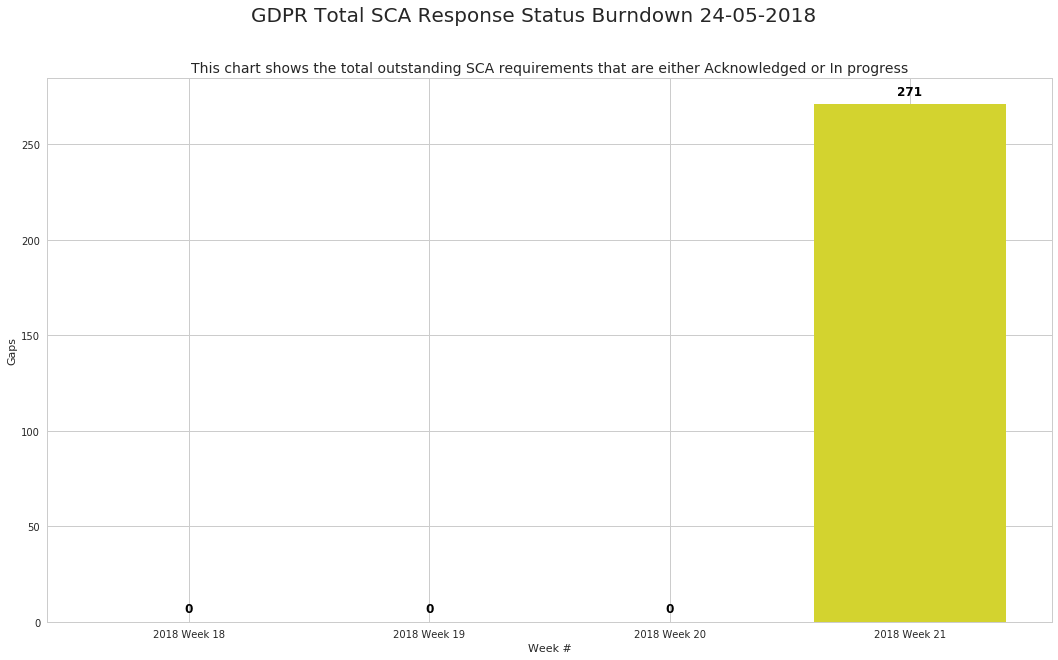

In [386]:
f, ax = plt.subplots(figsize=(18, 10))
bars = list(sca_status_burndown_df.loc['Total'])
xticks = list(sca_status_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color='#D3D32F')

for a,b in zip(x, bars):
    plt.text(a, b+5, str(int(b)), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.suptitle("GDPR Total SCA Response Status Burndown "+today, size=20)
plt.title("This chart shows the total outstanding SCA requirements that are either Acknowledged or In progress", size=14)
f.savefig(OUTPUT_BASE_DIR+"/SCA-Response-Status-Burndown-"+today+".png")

In [387]:
sca_compliancy_stats

,67,68,89,90,91,94,97,101,102,103,...,14,70,71,87,123,193,194,195,147,Total
0 - n/a,1.0,1.0,1.0,15.0,2.0,4.0,2.0,15.0,2.0,2.0,...,5.0,5.0,11.0,7.0,5.0,15.0,4.0,14.0,0.0,0.0
1 - Very Inadequate / Major Non-Conformity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0
2 - Inadequate / Minor Non-Conformity (high severity),1.0,1.0,2.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,104.0
3 - Partially adequate / Minor Non-Conformity (low severity),7.0,7.0,12.0,0.0,4.0,1.0,5.0,0.0,5.0,5.0,...,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,202.0
4 - Broadly adequate / Observation,6.0,6.0,0.0,0.0,0.0,10.0,8.0,0.0,8.0,8.0,...,10.0,6.0,4.0,8.0,6.0,0.0,8.0,1.0,15.0,386.0
5 - Substantially adequate / Compliant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
sca_burndown_df

,2018 Week 3,2018 Week 16,2018 Week 18,2018 Week 19,2018 Week 20,2018 Week 21
IoT,0,0,84,84,84,84.0
Cloud,0,0,89,89,89,89.0
Connectivity,0,0,97,97,97,97.0
EIT,0,0,32,32,29,29.0
UC,0,0,30,30,30,30.0
Total,0,327,332,332,329,329.0


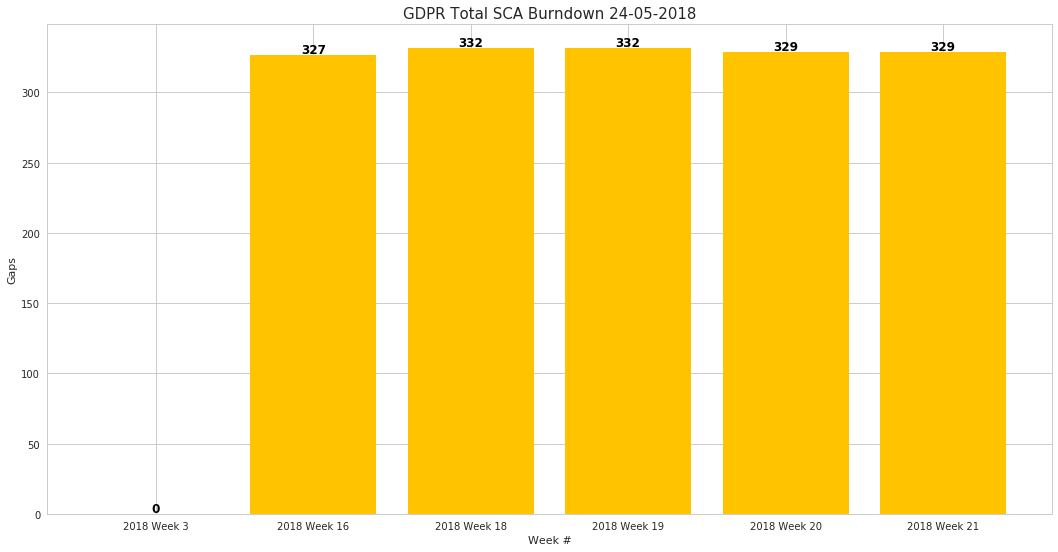

In [389]:
f, ax = plt.subplots(figsize=(18, 10))
f.subplots_adjust(bottom=0.2,hspace=0.5,wspace=0.5)

bars = list(sca_burndown_df.loc['Total'])
xticks = list(sca_burndown_df.columns)

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

DARK_BLUE = '#0B3360'

font = {'family': 'sans serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }

x= np.arange(len(bars))


plt.bar(x, bars, color=AMBER)

for a,b in zip(x, bars):
    plt.text(a, b+1, str(int(b)), font, horizontalalignment='center')

plt.xticks(x, xticks)
plt.xlabel("Week #")
plt.ylabel("Gaps")
plt.title("GDPR Total SCA Burndown "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/SCA-Burndown-"+today+".png")

In [390]:
COLUMNS = ['PRIVACY_REQUIREMENT_CONTENT', 'REQ_NO', 'VERTICAL', 'HORIZONTAL', 'HYBRID', 'PC', 'NC']

INDEX = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

set_a = set(['1H','2H','3H'])
set_b = set(['4H','5H','6V','7V','8H'])
set_c = set(['9V','10V'])
set_d = set(['11H','11V','12H','12V','13aH','13aV','13bH','13bV','14H','14V','15V','16V','17V','18H','18V','19V','20H','20V'])
set_e = set(['21V','22V','23V','24V','25V','26V','27V','28V','29H','30H','31H','32H','32V','33V','34V','35H','36H','37H','37V','38H',
             '38V','39H','39V','40H','40V','41H','41V','42H','42V','43H','43V'])
set_f = set(['44V','45V','46H','46V','47H','47V','48H','48V','49H','49V','50H','51V','52H','52V','53V','54V','55V','56V','57H','57V','58H'])
set_g = set(['59V','60H','61H','61V','62H','62V','63H','64H','65H','66H','67H','68H','69H','69V','70V','71V','72V','73H'])
set_h = set(['74V','75H','76H','76V','77V'])
set_i = set(['78V','79H','79V','80H'])

requirement_content = ['Define privacy responsibilities, document the data being processed, \
conduct privacy risk assessments and control identification (Privacy by Design), and ensure business accountability \
for implementation of controls and residual risks',
                      'Collection and purpose limitation',
                      'Protect confidentiality of communications and sensitive information',
                      'Provide a clear and understandable privacy notice',
                      'Obtain and manage necessary permissions for processing communications content, \
                      traffic data, location data, marketing, analytics and processing of sensitive data',
                      'Manage data diligently to maintain its accuracy and quality across product life cycle, not \
                      retain data for longer than is necessary and ensure rights and obligations related to data carry \
                      over to all instances of data',
                      'Design product to enable data subject’s right to access data, request deletion and data portability',
                      'Do not disclose personal data to unauthorized governmental agencies and ensure suppliers comply with \
                      Vodafone privacy and security requirements',
                      'Apply effective technical and organisational controls to protect personal data against unauthorized access, \
                      use, disclosure, modification or loss ',
                      'Acquire parental consents when providing information society services (online services) directly to children, use child appropriate language, \
                      avoid profiling of children and protect child personal data against unwanted disclosure']

vertical = [15, ]

all_risk_df = pd.DataFrame(columns=COLUMNS, index=INDEX)

all_risk_df['PRIVACY_REQUIREMENT_CONTENT'] = requirement_content

In [391]:
PCA_COMPLIANCE_INVERSE.get(input_heatmap.loc['1H'][67])

'FULLY COMPLIANT'

In [392]:
all_risk_df

,PRIVACY_REQUIREMENT_CONTENT,REQ_NO,VERTICAL,HORIZONTAL,HYBRID,PC,NC
A,"Define privacy responsibilities, document the ...",NaN,NaN,NaN,NaN,NaN,NaN
B,Collection and purpose limitation,NaN,NaN,NaN,NaN,NaN,NaN
C,Protect confidentiality of communications and ...,NaN,NaN,NaN,NaN,NaN,NaN
D,Provide a clear and understandable privacy notice,NaN,NaN,NaN,NaN,NaN,NaN
E,Obtain and manage necessary permissions for pr...,NaN,NaN,NaN,NaN,NaN,NaN
F,Manage data diligently to maintain its accurac...,NaN,NaN,NaN,NaN,NaN,NaN
G,Design product to enable data subject’s right ...,NaN,NaN,NaN,NaN,NaN,NaN
H,Do not disclose personal data to unauthorized ...,NaN,NaN,NaN,NaN,NaN,NaN
I,Apply effective technical and organisational c...,NaN,NaN,NaN,NaN,NaN,NaN
J,Acquire parental consents when providing infor...,NaN,NaN,NaN,NaN,NaN,NaN


In [393]:
sca_heatmap_df.replace(to_replace='0 - n/a', value=0, inplace=True)
sca_heatmap_df.replace(to_replace='1 - Very Inadequate / Major Non-Conformity', value=1, inplace=True)
sca_heatmap_df.replace(to_replace='2 - Inadequate / Minor Non-Conformity (high severity)', value=2, inplace=True)
sca_heatmap_df.replace(to_replace='3 - Partially adequate / Minor Non-Conformity (low severity)', value=3, inplace=True)
sca_heatmap_df.replace(to_replace='4 - Broadly adequate / Observation', value=4, inplace=True)
sca_heatmap_df.replace(to_replace='5 - Substantially adequate / Compliant', value=5, inplace=True)
sca_heatmap_df.replace(to_replace='TRANSFER', value=6, inplace=True)

sca_heatmap_df.fillna(0, inplace=True)

sca_heatmap_df

,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
9.2.1-A,3,3,3,0,3,4,4,0,4,4,...,0,4,3,4,0,3,0,4,0,4
9.2.2,3,3,3,0,3,4,4,0,4,4,...,3,0,0,0,0,0,0,0,0,4
9.2.3,3,3,3,0,2,4,4,0,4,4,...,4,0,0,0,0,0,0,0,0,4
9.2.5,3,3,3,0,2,4,4,0,4,4,...,2,4,3,0,4,3,0,4,0,4
9.2.6-A,3,3,3,0,2,3,3,0,3,3,...,2,4,2,0,0,2,0,4,0,4
9.2.6-B,3,3,3,0,2,4,3,0,3,3,...,3,4,2,4,0,2,0,4,0,4
9.4.1,4,4,3,0,3,4,4,0,4,4,...,0,4,4,0,0,4,0,4,0,4
9.4.2,4,4,3,0,3,4,0,0,0,0,...,4,4,4,0,4,4,0,4,0,4
12.4.1,4,4,3,0,2,4,4,0,4,4,...,1,4,4,0,4,4,0,3,0,4
12.4.3,4,4,3,0,2,4,3,0,3,3,...,2,4,4,0,4,4,0,3,0,4


# Build SCA Heatmaps

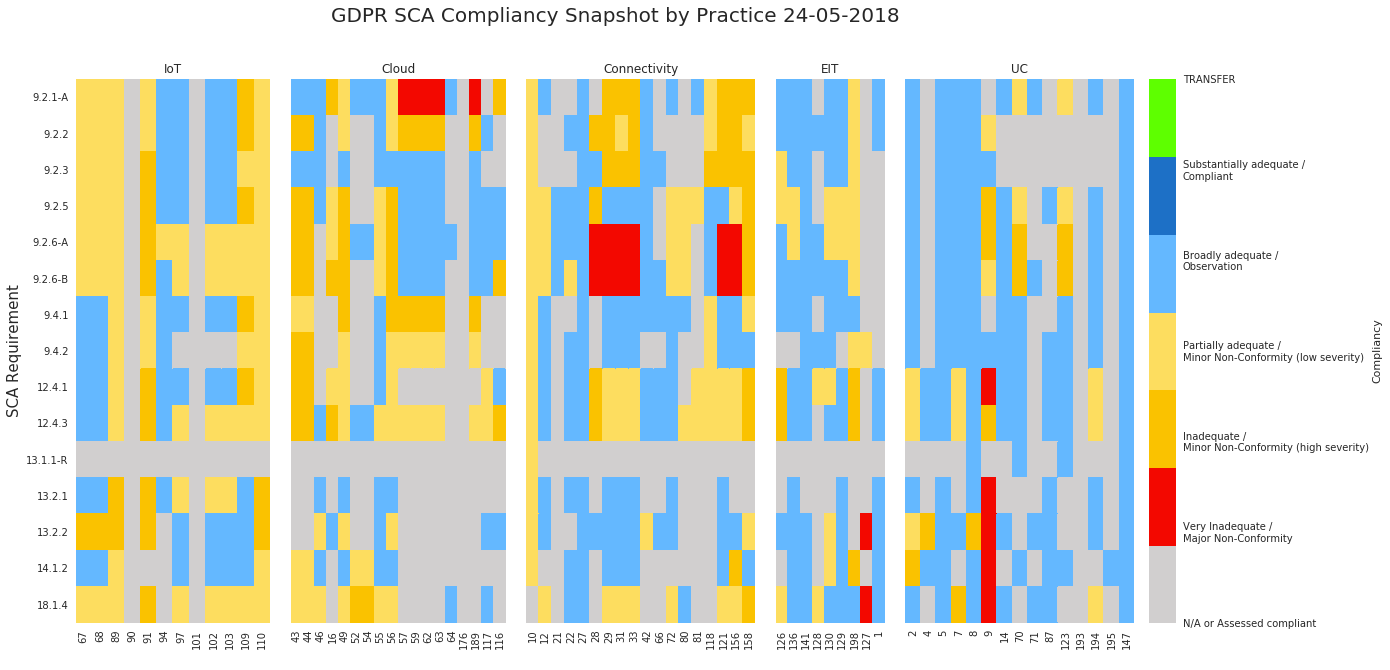

In [394]:
#SCA Heatmaps
# create subplots
sca_heatmap_df.columns.name = " "

iot_sca_heatmap_df = sca_heatmap_df[iot_cols]
cloud_sca_heatmap_df = sca_heatmap_df[cloud_cols]
connectivity_sca_heatmap_df = sca_heatmap_df[connectivity_cols]
eit_sca_heatmap_df = sca_heatmap_df[eit_cols]
uc_sca_heatmap_df = sca_heatmap_df[uc_cols]



f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.38,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

#SCA Colours
SCA6_COL = '#5eff00'
SCA5_COL = '#1d70c6'
SCA4_COL = '#64b8ff'
SCA3_COL = '#fddd5f'
SCA2_COL = '#fac200'
SCA1_COL = '#f30800'
SCA0_COL = '#d1cfcf'

cmap=mcolors.ListedColormap([SCA0_COL,
                             SCA1_COL,
                             SCA2_COL,
                             SCA3_COL,
                             SCA4_COL,
                             SCA5_COL,
                             SCA6_COL])


title = "GDPR SCA Compliancy Snapshot by Practice "+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_sca_heatmap_df, ax=ax, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('SCA Requirement', size=15)

zx1 = sns.heatmap(cloud_sca_heatmap_df, ax=ax1, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_sca_heatmap_df, ax=ax2, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_sca_heatmap_df, ax=ax3, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(uc_sca_heatmap_df, ax=ax4, square=False, vmin=0, vmax=6, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(['N/A or Assessed compliant',
                     'Very Inadequate / \nMajor Non-Conformity',
                     'Inadequate / \nMinor Non-Conformity (high severity)', 
                     'Partially adequate / \nMinor Non-Conformity (low severity)', 
                     'Broadly adequate / \nObservation',
                     'Substantially adequate / \nCompliant',
                     'TRANSFER'])

f.savefig(OUTPUT_BASE_DIR+"/SCA-Baseline-Per-Practice-Heatmap-"+today+".png", bbox_inches='tight',pad_inches=1)

In [395]:
#convert back
sca_heatmap_df.replace(to_replace=0, value=SCA_COMPLIANCE_INVERSE.get(0), inplace=True)
sca_heatmap_df.replace(to_replace=1, value=SCA_COMPLIANCE_INVERSE.get(1), inplace=True)
sca_heatmap_df.replace(to_replace=2, value=SCA_COMPLIANCE_INVERSE.get(2), inplace=True)
sca_heatmap_df.replace(to_replace=3, value=SCA_COMPLIANCE_INVERSE.get(3), inplace=True)
sca_heatmap_df.replace(to_replace=4, value=SCA_COMPLIANCE_INVERSE.get(4), inplace=True)
sca_heatmap_df.replace(to_replace=5, value=SCA_COMPLIANCE_INVERSE.get(5), inplace=True)

heatmap_df.replace(to_replace=1, value=PCA_COMPLIANCE_INVERSE.get(1), inplace=True)
heatmap_df.replace(to_replace=2, value=PCA_COMPLIANCE_INVERSE.get(2), inplace=True)
heatmap_df.replace(to_replace=3, value=PCA_COMPLIANCE_INVERSE.get(3), inplace=True)
heatmap_df.replace(to_replace=4, value=PCA_COMPLIANCE_INVERSE.get(4), inplace=True)
heatmap_df.replace(to_replace=5, value=PCA_COMPLIANCE_INVERSE.get(5), inplace=True)

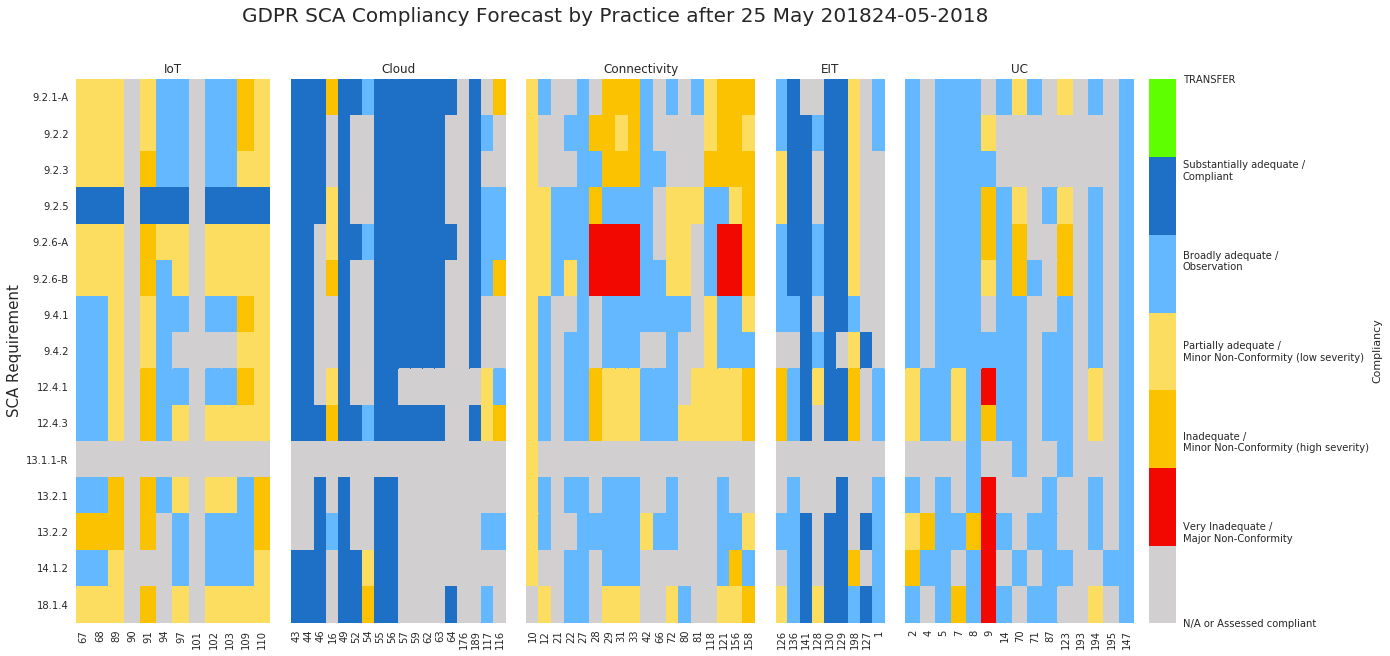

In [396]:
#SCA Heatmaps
# create subplots
#sca_heatmap_df.columns.name = " "

iot_sca_heatmap_df = sca_forcast_heatmap[iot_cols]
cloud_sca_heatmap_df = sca_forcast_heatmap[cloud_cols]
connectivity_sca_heatmap_df = sca_forcast_heatmap[connectivity_cols]
eit_sca_heatmap_df = sca_forcast_heatmap[eit_cols]
uc_sca_heatmap_df = sca_forcast_heatmap[uc_cols]



f, (ax, ax1, ax2, ax3, ax4) = plt.subplots(ncols=5, sharex=False, sharey=True, figsize=(20, 10), 
                                           gridspec_kw={"width_ratios":[0.68,0.75,0.8,0.38,1]})
#f.colorbar
f.subplots_adjust(hspace=0.1,wspace=0.1)
#f.subplots_adjust(right=0.5)

cmap=mcolors.ListedColormap([SCA0_COL,
                             SCA1_COL,
                             SCA2_COL,
                             SCA3_COL,
                             SCA4_COL,
                             SCA5_COL,
                             SCA6_COL])


title = "GDPR SCA Compliancy Forecast by Practice after 25 May 2018"+today
f.suptitle(title, size=20)


zx = sns.heatmap(iot_sca_heatmap_df, ax=ax, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, yticklabels=True, xticklabels=True)

ax.set_title('IoT')
ax.set_ylabel('SCA Requirement', size=15)

zx1 = sns.heatmap(cloud_sca_heatmap_df, ax=ax1, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax1.set_title('Cloud')

zx2 = sns.heatmap(connectivity_sca_heatmap_df, ax=ax2, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax2.set_title('Connectivity')

zx3 = sns.heatmap(eit_sca_heatmap_df, ax=ax3, square=False, vmin=0, vmax=6, cmap=cmap, cbar=False, xticklabels=True)
ax3.set_title('EIT')

zx4 = sns.heatmap(uc_sca_heatmap_df, ax=ax4, square=False, vmin=0, vmax=6, cmap=cmap, xticklabels=True, cbar_kws={"orientation": "vertical","label": "Compliancy"})
ax4.set_title('UC')

cbar = zx4.collections[0].colorbar
cbar.set_ticks([0, 1, 2, 3, 4, 5, 6])
cbar.set_ticklabels(['N/A or Assessed compliant',
                     'Very Inadequate / \nMajor Non-Conformity',
                     'Inadequate / \nMinor Non-Conformity (high severity)', 
                     'Partially adequate / \nMinor Non-Conformity (low severity)', 
                     'Broadly adequate / \nObservation',
                     'Substantially adequate / \nCompliant',
                     'TRANSFER'])

f.savefig(OUTPUT_BASE_DIR+"/SCA-Forecast-Per-Practice-Heatmap-"+today+".png", bbox_inches='tight',pad_inches=1)

In [397]:
pca_baseline.fillna('N/A', inplace=True)

In [398]:
output_writer = pd.ExcelWriter(OUTPUT_BASE_DIR+'/GDPR-SNAPSHOT-Week'+week+'-'+today+'.xlsx')
heatmap_df.to_excel(output_writer, 'PCA Baseline')
pca_baseline.to_excel(output_writer, 'PCA Rollup Baseline')
new_compliancy_stats.to_excel(output_writer, 'PCA Rollup Baseline Stats')
sca_heatmap_df.to_excel(output_writer, 'SCA Baseline')
pca_df.to_excel(output_writer, 'PCA Data Table')
sca_df.to_excel(output_writer, 'SCA Data Table')
sca_compliancy_stats.to_excel(output_writer, 'SCA Baseline Stats')
pca_rolled_up_heatmap_forecast.to_excel(output_writer, 'PCA Forecast')
sca_forcast_heatmap.to_excel(output_writer, 'SCA Forecast')
output_writer.save()

In [399]:
pca_df['Compliance Assessment'].value_counts()

PARTIALLY COMPLIANT      2654
NON-COMPLIANT            1548
PARTIALLY COMPLIANT f     368
PARTIALLY COMPLIANT       318
NON-COMPLIANT f           262
N/A                       130
NON-COMPLIANT              40
FULLY COMPLIANT            19
COMPLIANT                   4
N/a                         3
Name: Compliance Assessment, dtype: int64

In [400]:
output_writer = pd.ExcelWriter('./burndown.xlsx')
pca_burndown_df.to_excel(output_writer, 'PCA Burndown')
rolled_up_pca_burndown_df.to_excel(output_writer, 'PCA Burndown Rolled Up')
sca_burndown_df.to_excel(output_writer, 'SCA Burndown')
pca_status_burndown_df.to_excel(output_writer, 'PCA Status Burndown')
sca_status_burndown_df.to_excel(output_writer, 'SCA Status Burndown')
output_writer.save()

# Create HTML Heatmap

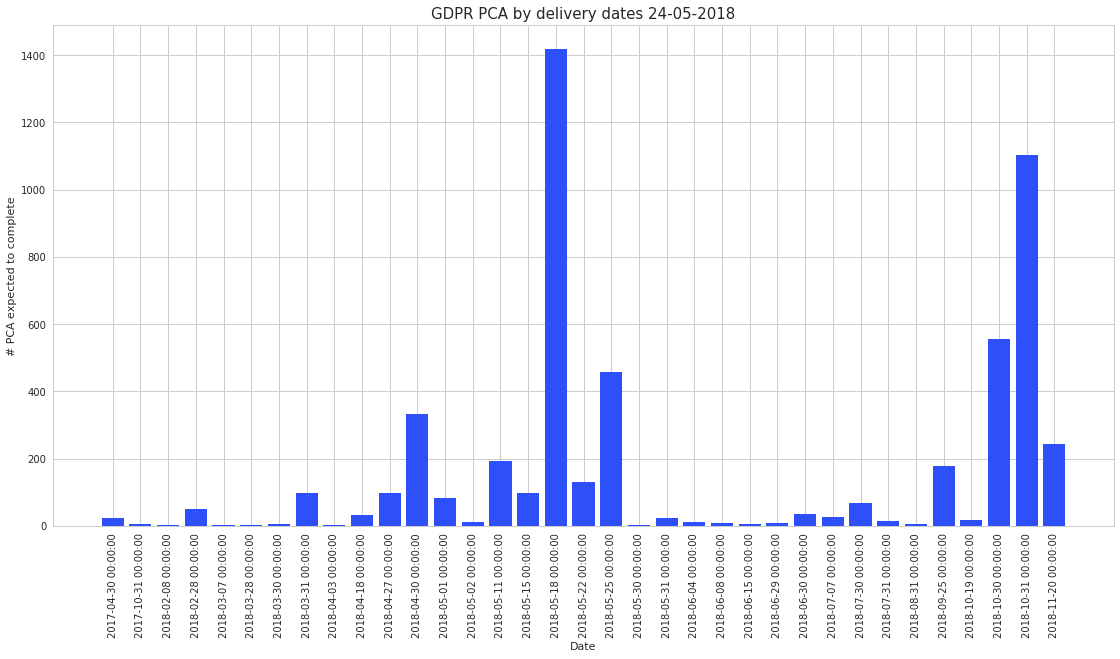

In [401]:
dates_dict = OrderedDict(pca_df['Delivery Date'].value_counts(sort=False))
dates_dict.keys().sort()
dates_dict

sorted_dict = OrderedDict(sorted(dates_dict.items(), key=lambda t: t[0]))


f, ax = plt.subplots(figsize=(19, 12))
f.subplots_adjust(bottom=0.3,hspace=0.5,wspace=0.5)

#OrderedDict(sorted(d.items(), key=lambda t: t[0]))
dates = sorted_dict

bars = list(dates.values())
xticks = list(dates.keys())

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

x= np.arange(len(bars))

plt.bar(x, bars, color=BLUE)
plt.xticks(x, xticks, rotation=90)
plt.xlabel("Date")
plt.ylabel("# PCA expected to complete")
plt.title("GDPR PCA by delivery dates "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/PCA-Delivery-Dates-"+today+".png")

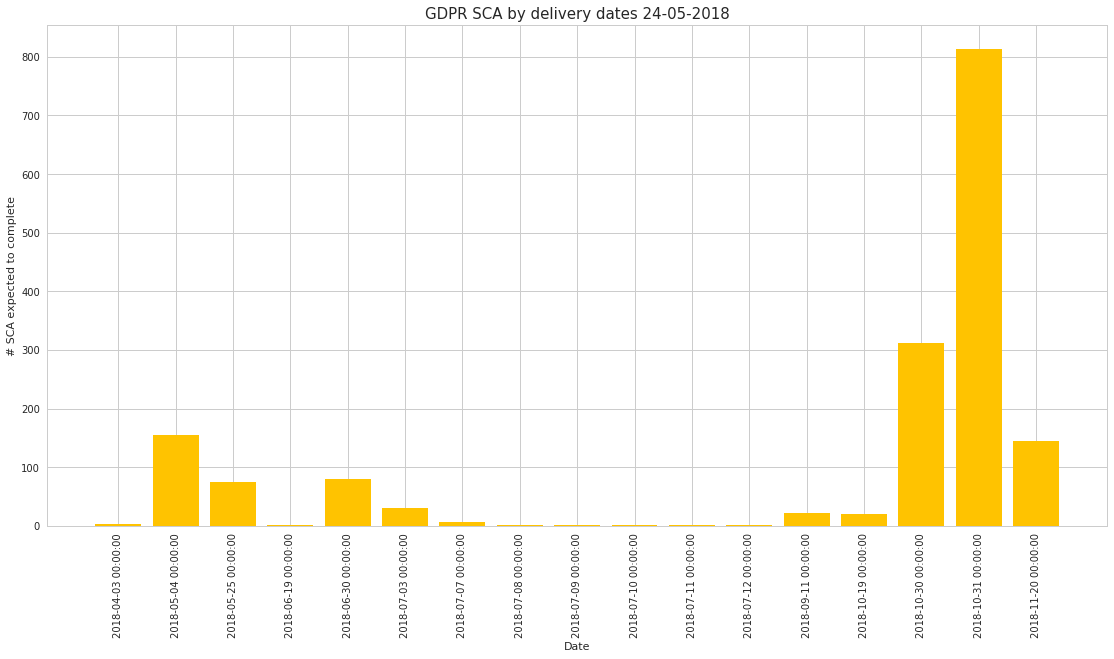

In [403]:
dates_dict = OrderedDict(sca_df['Delivery Date'].value_counts(sort=False))
dates_dict.keys().sort()
dates_dict

sorted_dict = OrderedDict(sorted(dates_dict.items(), key=lambda t: t[0]))


f, ax = plt.subplots(figsize=(19, 12))
f.subplots_adjust(bottom=0.3,hspace=0.5,wspace=0.5)

#OrderedDict(sorted(d.items(), key=lambda t: t[0]))
dates = sorted_dict

bars = list(dates.values())
xticks = list(dates.keys())

#bar1.append(pca_burndown_df[today]['Total'])

#xticks.append(today)

x= np.arange(len(bars))

plt.bar(x, bars, color=AMBER)
plt.xticks(x, xticks, rotation=90)
plt.xlabel("Date")
plt.ylabel("# SCA expected to complete")
plt.title("GDPR SCA by delivery dates "+today, size=15)
f.savefig(OUTPUT_BASE_DIR+"/SCA-Delivery-Dates-"+today+".png")

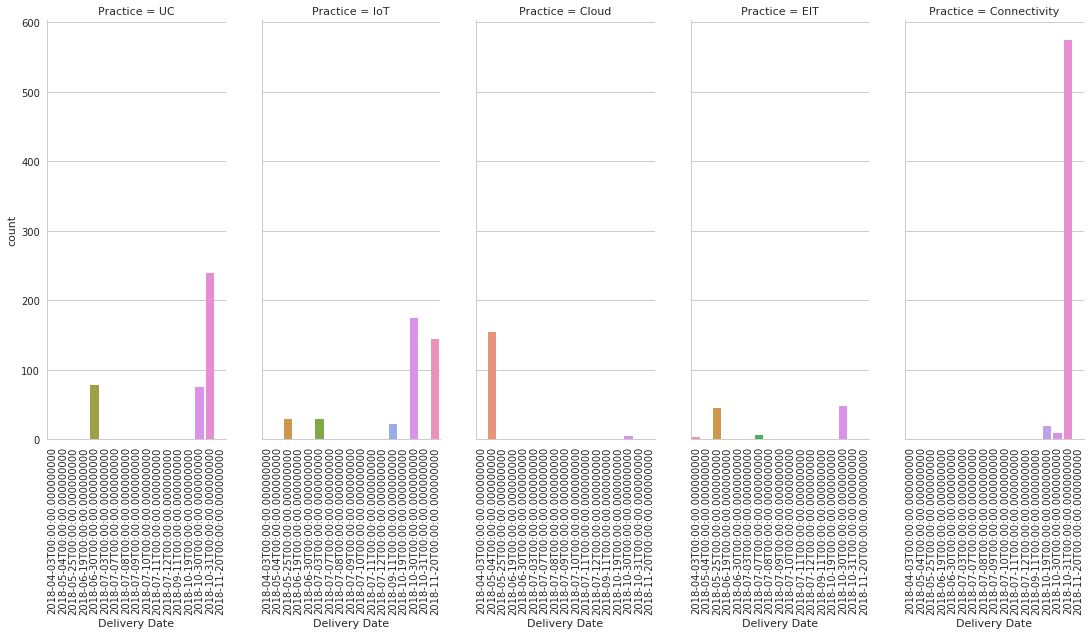

In [492]:
#f, ax = plt.subplots(figsize=(19, 12))
#f.subplots_adjust(bottom=0.3,hspace=0.5,wspace=0.5)

#g = sns.countplot(data=sca_df, x='Delivery Date')


g = sns.factorplot(data=sca_df, x='Delivery Date', 
                   hue=None, col="Practice", 
                   kind="count", size=7, aspect=1, legend=False,
                   orient="h",
                   col_wrap=None);
#g = g.map(plt.scatter, "Delivery Date", "Response", edgecolor="w")
#g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_xticklabels(rotation=90)
g.fig.tight_layout(w_pad=1)
g.fig.subplots_adjust(bottom=0.3,hspace=0.5,wspace=0.2, left=0.1,right=0.9)
g.fig.set_size_inches(h=9,w=18)
g.fig.savefig(OUTPUT_BASE_DIR+"/SCA-Delivery-Dates-ByPractice-"+today+".png")

In [212]:
pca_df.head()

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
0,NON-COMPLIANT,2018-05-15,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,EPS-PCA-1H,EPS147-PCA-1H-A,1H,Acknowledged,NaN,EPS147-PCA-1H,PCA,Project Code Allocated,UC,A,HORIZONTAL,NaN,NaN,NaN
1,NON-COMPLIANT,2018-05-18,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-4H,EPS147-PCA-4H-A,4H,Acknowledged,NaN,EPS147-PCA-4H,PCA,Project Code Allocated,UC,B,HORIZONTAL,NaN,NaN,NaN
2,PARTIALLY COMPLIANT,2018-05-18,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57H-A,57H,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57H,PCA,No Project Code,UC,F,HORIZONTAL,NaN,NaN,NaN
3,PARTIALLY COMPLIANT,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,No Response,EPS147-PCA-57V-A,57V,Rejected,Ben Datlen - 25/04/2018: Vodafone do not proce...,EPS147-PCA-57V,PCA,No Project Code,UC,F,VERTICAL,NaN,NaN,NaN
4,PARTIALLY COMPLIANT,2018-10-31,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-57H,EPS147-PCA-58H-A,58H,Acknowledged,NaN,EPS147-PCA-58H,PCA,Project Code Allocated,UC,F,HORIZONTAL,NaN,NaN,NaN


In [213]:
def return_risk_score( risk_cat ):
    #print int(prod_id)
    if risk_cat == 'A':
        return 1
    elif risk_cat == 'B':
        return 2
    elif risk_cat == 'C':
        return 3
    elif risk_cat == 'D':
        return 4
    elif risk_cat == 'E':
        return 5
    elif risk_cat == 'F':
        return 6
    elif risk_cat == 'G':
        return 7
    elif risk_cat == 'H':
        return 8
    elif risk_cat == 'I':
        return 9
    
pca_df['Risk Score'] = pca_df['Risk Category'].map(lambda x: return_risk_score(x))

In [214]:
pca_df['Comp'] = pca_df['Compliance Assessment'].map(lambda x: PCA_COMPLIANCE.get(x))
pca_df.head(2)

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,...,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA,Risk Score,Comp
0,NON-COMPLIANT,2018-05-15,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,EPS-PCA-1H,EPS147-PCA-1H-A,1H,Acknowledged,NaN,...,PCA,Project Code Allocated,UC,A,HORIZONTAL,NaN,NaN,NaN,1.0,5
1,NON-COMPLIANT,2018-05-18,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,GE-PCA-4H,EPS147-PCA-4H-A,4H,Acknowledged,NaN,...,PCA,Project Code Allocated,UC,B,HORIZONTAL,NaN,NaN,NaN,2.0,5


# Create HTML Report

In [215]:
from math import pi
import pandas as pd

from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
)
from bokeh.plotting import figure, show, output_file, reset_output

In [216]:
"""
PCA_COMPLIANCE = {
    'NON-COMPLIANT':5, 
    'NON-COMPLIANT ':5, 
    'NON-COMPLIANT f':5, 
    'NON-COMPLIANT(F)':5, 
    'PARTIALLY COMPLIANT':4, 
    'PARTIALLY COMPLIANT ':4, 
    'PARTIALLY COMPLIANT f':4,
    'PARTIALLY COMPLIANT(F)':4,
    'COMPLIANT':3,
    'FULLY COMPLIANT':3,
    'FULLY COMPLIANT ':3,
    'FULLY COMPLIANT f':3,
    'TRANSFER':2,
    'RESOLVED':2,
    'N/a':1,
    'N/A':1
}

GREY = '#9B9B9B'
GREEN = '#06C454'
BLUE = '#2E50FB'
AMBER = '#FFC300'
RED = '#D32F2F'
"""

pca_data = pca_rollup_target.copy()

In [217]:
#pca_data.rename(columns = {'Req nr':'PCA'}, inplace = True)

#pca_data['PCA'] = pca_data['PCA'].astype(str)
cols = list(pca_data.columns.astype(str))
pca_data.columns = cols
#pca_data = pca_data.set_index('PCA')
pca_data.index.name = 'PCA'
pca_data.columns.name = 'Product'

pca_data.replace('N/A', 1.0, inplace=True)
pca_data.replace('RESOLVED/TRANSFERED', 2.0, inplace=True)
pca_data.replace('FULLY COMPLIANT', 3.0, inplace=True)
pca_data.replace('PARTIALLY COMPLIANT', 4.0, inplace=True)
pca_data.replace('NON-COMPLIANT', 5.0, inplace=True)

In [218]:
pca_data.head()

Product,67,68,89,90,91,94,97,101,102,103,...,9,14,70,71,87,123,193,194,195,147
PCA,,,,,,,,,,,,,,,,,,,,,
1,3.0,4.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,...,5.0,2.0,4.0,4.0,5.0,5.0,2.0,2.0,2.0,5.0
2,4.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,...,5.0,2.0,4.0,4.0,5.0,4.0,2.0,2.0,2.0,3.0
3,4.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,...,2.0,1.0,3.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0
4,2.0,3.0,5.0,5.0,5.0,5.0,5.0,2.0,5.0,5.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,5.0
5,3.0,3.0,3.0,4.0,3.0,3.0,4.0,2.0,3.0,3.0,...,3.0,2.0,3.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0


In [219]:
# reshape to 1D array or rates with a month and year for each row.
df = pd.DataFrame(pca_data.stack(), columns=['compliancy']).reset_index()
#ataFrame.sort(columns=None, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', **kwargs)
#df.sort_values(by='PCA', ascending=False, inplace=True)
#df.reset_index(inplace=True,drop=True)
df = df.copy()
df.head()

,PCA,Product,compliancy
0,1,67,3.0
1,1,68,4.0
2,1,89,3.0
3,1,90,3.0
4,1,91,3.0


In [220]:
cookbook_df = pd.read_excel("/home/andy/dev/notebooks/Transfer-RS-Feedback/Cookbook/PCA SCA Cookbook Mapping_1.03.xlsx", 
                            sheet_name="PCA", skiprows=1)

cookbook_df['Privacy Requirement'].fillna(method='ffill', inplace=True)
cookbook_df.head(1)

,Req nr,RS Reference Number,Req category,Privacy Requirement,Implementation criteria (if applicable),Cookbook RS Statements,Relevant for Controller (C) OR Processor (P),People+Process Applicable,Technology (& Design) Applicable,Delivery Guide Mapping,Horizontal / Vertical,Responsible Programme,Accountable,Responsible,Delivery Category,Support & Advisor,Template Dependency,Notes
0,1,EPSXXX-PCA01-Y,"Define privacy responsibilities, document the ...",Must design and engineer privacy into products...,Accountability and resources: Roles and respon...,1. A privacy champion must be identified in t...,"C, P",Mandatory,NaN,7.7,Horizontal,EP&S Programme,EP&S Programme,EP&S Programme,Governance (requires privacy guidelines),NaN,"No, however Product Team may need to implement...",EP&S GDPR Programme Governance to fulfil EP&S ...


In [221]:
#cookbook_df = cookbook_df[['Req nr', 'Req category', 'Privacy Requirement']]

In [222]:
"""A.merge(B, left_on='lkey', right_on='rkey', how='outer')
   lkey  value_x  rkey  value_y
0  foo   1        foo   5
1  foo   4        foo   5
2  bar   2        bar   6
3  bar   2        bar   8
4  baz   3        NaN   NaN
5  NaN   NaN      qux   7"""

df = df.merge(cookbook_df, left_on='PCA', right_on='Req nr', how='outer')

In [223]:
#df.rename({'Req category': 'category', 'Privacy Requirement': 'requirement'}, axis=1,inplace=True)
df.head(2)

,PCA,Product,compliancy,Req nr,RS Reference Number,Req category,Privacy Requirement,Implementation criteria (if applicable),Cookbook RS Statements,Relevant for Controller (C) OR Processor (P),...,Technology (& Design) Applicable,Delivery Guide Mapping,Horizontal / Vertical,Responsible Programme,Accountable,Responsible,Delivery Category,Support & Advisor,Template Dependency,Notes
0,1,67,3.0,1,EPSXXX-PCA01-Y,"Define privacy responsibilities, document the ...",Must design and engineer privacy into products...,Accountability and resources: Roles and respon...,1. A privacy champion must be identified in t...,"C, P",...,NaN,7.7,Horizontal,EP&S Programme,EP&S Programme,EP&S Programme,Governance (requires privacy guidelines),NaN,"No, however Product Team may need to implement...",EP&S GDPR Programme Governance to fulfil EP&S ...
1,1,68,4.0,1,EPSXXX-PCA01-Y,"Define privacy responsibilities, document the ...",Must design and engineer privacy into products...,Accountability and resources: Roles and respon...,1. A privacy champion must be identified in t...,"C, P",...,NaN,7.7,Horizontal,EP&S Programme,EP&S Programme,EP&S Programme,Governance (requires privacy guidelines),NaN,"No, however Product Team may need to implement...",EP&S GDPR Programme Governance to fulfil EP&S ...


In [224]:
pca = list(pca_data.index.astype(str))
product = list(pca_data.columns)

In [225]:
# this is the colormap from the original NYTimes plot
colors = [GREY, GREEN, BLUE, AMBER, RED]
mapper = LinearColorMapper(palette=colors, low=df.compliancy.min(), high=df.compliancy.max())

In [226]:
datadict = df.to_dict(orient='list', into=OrderedDict)

In [227]:
#datadict
reset_output()

In [228]:
source = ColumnDataSource(datadict)

In [229]:
#datadict[u'Req category']

In [230]:
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

p = figure(title="EP&S PCA Compliancy - (1 = Not Applicable, 2 = Transfer/Resolved, 3 = Fully Compliant, 4 = Partially Compliant, 5 = Non-Compliant)",
           x_range=list(product), y_range=list((pca)),
           x_axis_location="above", plot_width=1000, plot_height=600,
           tools=TOOLS, toolbar_location='below')

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = pi / 3

p.rect(x="Product", y="PCA", width=1, height=1,
       source=source,
       fill_color={'field': 'compliancy', 'transform': mapper},
       line_color=None)

color_bar = ColorBar(color_mapper=mapper, major_label_text_font_size="5pt",
                     ticker=BasicTicker(desired_num_ticks=len(colors)),
                     formatter=PrintfTickFormatter(format="%d"),
                     label_standoff=6, border_line_color=None, location=(0, 0))
p.add_layout(color_bar, 'right')

p.select_one(HoverTool).tooltips = [
     ('PCA', '@PCA'),
     ('Category', '@{Req category}'),
     ('Requirement', '@{Privacy Requirement}{safe}'),
     ('Product', '@Product'),
     ('Compliancy', '@compliancy'),
]

p.select_one(HoverTool).attachment = "horizontal"

output_file(OUTPUT_BASE_DIR+"/PCA-Compliancy-Report-"+today+".html")

In [231]:
#show(p)

In [232]:
pwd

u'/home/andy/dev/notebooks/Transfer-RS-Feedback'

In [233]:
before_25May_df = pca_df[pca_df['Delivery Date'] <= '2018-05-25'].copy()

In [234]:
after_25May_df = pca_df[pca_df['Delivery Date'] > '2018-05-25'].copy()

In [235]:
output_writer = pd.ExcelWriter(OUTPUT_BASE_DIR+'/GDPR-BYDATE-SNAPSHOT-Week'+week+'-'+today+'.xlsx')
before_25May_df.to_excel(output_writer, 'PCA Up to 25 May')
after_25May_df.to_excel(output_writer, 'PCA After 25 May')


In [236]:
after_25May_df.shape

(2303, 21)

In [237]:
sca_before_25May_df = sca_df[sca_df['Delivery Date'] <= '2018-05-25'].copy()

In [238]:
sca_after_25May_df = sca_df[sca_df['Delivery Date'] > '2018-05-25'].copy()

In [239]:
sca_before_25May_df.to_excel(output_writer, 'SCA Up to 25 May')
sca_after_25May_df.to_excel(output_writer, 'SCA After 25 May')

output_writer.save()

In [240]:
forecast_gap_counts = {
    'IoT':0,
    'Cloud':0,
    'Connectivity':0,
    'EIT':0,
    'UC':0
}

#for p in after_25May_df['Product ID']:
prev_prod_set = set()

for p in after_25May_df['Product ID']:
    if p not in prev_prod_set:
        prev_prod_set.add(p)
        practice = after_25May_df[after_25May_df['Product ID']==p]['Practice'].iloc[0]

        #print len(after_25May_df[after_25May_df['Product ID']==p]['Practice'])

        length = after_25May_df[after_25May_df['Product ID']==p]['Req nr'].drop_duplicates().count()

        #print p
        #print practice

        current_gap = forecast_gap_counts.get(practice)

        #print 'current_gap'
        #print current_gap

        forecast_gap_counts[practice] = (current_gap+length)
        #print forecast_gap_counts[practice]
        #print forecast_gap_counts

forecast_gap_counts

{'Cloud': 15, 'Connectivity': 329, 'EIT': 74, 'IoT': 143, 'UC': 193}

In [241]:
len(after_25May_df[after_25May_df['Product ID']==72]['Req nr'].drop_duplicates())

13

In [242]:
after_25May_df[after_25May_df['Product ID']==72]['Req nr'].drop_duplicates().count()

13

In [243]:
forecast_gap_counts = {
    'IoT':0,
    'Cloud':0,
    'Connectivity':0,
    'EIT':0,
    'UC':0
}

#for p in after_25May_df['Product ID']:
prev_prod_set = set()

for p in sca_after_25May_df['Product ID']:
    if p not in prev_prod_set:
        prev_prod_set.add(p)
        practice = sca_after_25May_df[sca_after_25May_df['Product ID']==p]['Practice'].iloc[0]

        #print len(after_25May_df[after_25May_df['Product ID']==p]['Practice'])

        length = sca_after_25May_df[sca_after_25May_df['Product ID']==p]['Req nr'].drop_duplicates().count()

        #print p
        #print practice

        current_gap = forecast_gap_counts.get(practice)

        #print 'current_gap'
        #print current_gap

        forecast_gap_counts[practice] = (current_gap+length)
        #print forecast_gap_counts[practice]
        #print forecast_gap_counts

forecast_gap_counts

{'Cloud': 5, 'Connectivity': 189, 'EIT': 44, 'IoT': 123, 'UC': 118}

In [244]:
sca_forecast_gap_df = pd.DataFrame(data=forecast_gap_counts.values(), index=forecast_gap_counts.keys())

In [245]:
sca_forecast_gap_df

,0
Connectivity,189
UC,118
IoT,123
EIT,44
Cloud,5


In [246]:
iot_sca_forecast = iot_sca_heatmap_df.apply(pd.Series.value_counts)
#cloud_sca_heatmap_df
#connectivity_sca_heatmap_df
#eit_sca_heatmap_df
#uc_sca_heatmap_df
iot_sca_forecast.fillna(0,inplace=True)

iot_sca_forecast['Total'] = 0

for i in iot_sca_forecast.index:
    iot_sca_forecast.loc[i,'Total'] = iot_sca_forecast.loc[i].sum()

#iot_sca_heatmap_df['Response'] = ['N/A',
#                             'Closed',
#                             'Completed',
#                             'Remediation in progress',
#                             'Rejected',
#                             'Acknowledged',
#                             'No Response']
"""
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant',
    6:'TRANSFER'
"""

iot_total_outstanding = iot_sca_forecast.iloc[1:-3]['Total'].sum()

iot_sca_forecast

,67,68,89,90,91,94,97,101,102,103,109,110,Total
0,1,1,1.0,15.0,2.0,4.0,2.0,15.0,2.0,2.0,1,1.0,47.0
2,1,1,2.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4,2.0,18.0
3,6,6,11.0,0.0,4.0,1.0,5.0,0.0,5.0,5.0,6,11.0,60.0
4,6,6,0.0,0.0,0.0,9.0,7.0,0.0,7.0,7.0,3,0.0,45.0
5,1,1,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1,1.0,10.0


In [247]:
iot_total_outstanding

18.0

In [248]:
cloud_sca_forecast = cloud_sca_heatmap_df.apply(pd.Series.value_counts)
#cloud_sca_heatmap_df
#connectivity_sca_heatmap_df
#eit_sca_heatmap_df
#uc_sca_heatmap_df
cloud_sca_forecast.fillna(0,inplace=True)

cloud_sca_forecast['Total'] = 0

for i in cloud_sca_forecast.index:
    cloud_sca_forecast.loc[i,'Total'] = cloud_sca_forecast.loc[i].sum()

#iot_sca_heatmap_df['Response'] = ['N/A',
#                             'Closed',
#                             'Completed',
#                             'Remediation in progress',
#                             'Rejected',
#                             'Acknowledged',
#                             'No Response']
"""
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant',
    6:'TRANSFER'
"""

cloud_total_outstanding = cloud_sca_forecast.iloc[1:-3]['Total'].sum()

cloud_sca_forecast

,43,44,46,16,49,52,54,55,56,57,59,62,63,64,176,189,117,116,Total
0,3.0,3.0,6.0,8.0,1.0,10.0,10.0,1.0,1.0,6.0,6.0,6.0,6.0,12.0,15.0,6.0,7.0,8.0,115.0
2,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0
3,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,6.0
4,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,14.0
5,12.0,12.0,9.0,0.0,14.0,5.0,0.0,14.0,14.0,9.0,9.0,9.0,9.0,3.0,0.0,9.0,0.0,0.0,128.0


In [249]:
cloud_total_outstanding

7.0

In [250]:
connectivity_sca_forecast = connectivity_sca_heatmap_df.apply(pd.Series.value_counts)
#cloud_sca_heatmap_df
#connectivity_sca_heatmap_df
#eit_sca_heatmap_df
#uc_sca_heatmap_df
connectivity_sca_forecast.fillna(0,inplace=True)

connectivity_sca_forecast['Total'] = 0

for i in connectivity_sca_forecast.index:
    connectivity_sca_forecast.loc[i,'Total'] = connectivity_sca_forecast.loc[i].sum()

#iot_sca_heatmap_df['Response'] = ['N/A',
#                             'Closed',
#                             'Completed',
#                             'Remediation in progress',
#                             'Rejected',
#                             'Acknowledged',
#                             'No Response']
"""
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant',
    6:'TRANSFER'
"""

connectivity_total_outstanding = connectivity_sca_forecast.iloc[1:-2]['Total'].sum()

connectivity_sca_forecast

,10,12,21,22,27,28,29,31,33,42,66,72,80,81,118,121,156,158,Total
0,1.0,4.0,12.0,5.0,1.0,7.0,1,1,1,5.0,9.0,4.0,9.0,11.0,5.0,1,2,2.0,81.0
1,0.0,0.0,0.0,0.0,0.0,2.0,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.0,12.0
2,0.0,0.0,0.0,0.0,0.0,4.0,3,2,3,0.0,0.0,0.0,0.0,0.0,1.0,3,4,8.0,28.0
3,14.0,4.0,0.0,1.0,0.0,0.0,3,4,3,1.0,0.0,4.0,4.0,3.0,6.0,3,4,3.0,57.0
4,0.0,7.0,3.0,9.0,14.0,2.0,6,6,6,9.0,6.0,7.0,2.0,1.0,3.0,6,3,2.0,92.0


In [251]:
connectivity_total_outstanding

40.0

In [252]:
eit_sca_forecast = eit_sca_heatmap_df.apply(pd.Series.value_counts)
#cloud_sca_heatmap_df
#connectivity_sca_heatmap_df
#eit_sca_heatmap_df
#uc_sca_heatmap_df
eit_sca_forecast.fillna(0,inplace=True)

eit_sca_forecast['Total'] = 0

for i in eit_sca_forecast.index:
    eit_sca_forecast.loc[i,'Total'] = eit_sca_forecast.loc[i].sum()

#iot_sca_heatmap_df['Response'] = ['N/A',
#                             'Closed',
#                             'Completed',
#                             'Remediation in progress',
#                             'Rejected',
#                             'Acknowledged',
#                             'No Response']
"""
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant',
    6:'TRANSFER'
"""

eit_total_outstanding = eit_sca_forecast.iloc[1:-3]['Total'].sum()

eit_sca_forecast

,126,136,141,128,130,129,198,127,1,Total
0,4.0,2.0,3.0,9.0,2.0,2.0,3.0,12.0,7.0,44.0
2,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0
3,3.0,0.0,0.0,2.0,0.0,0.0,7.0,0.0,0.0,12.0
4,6.0,7.0,0.0,4.0,0.0,0.0,2.0,0.0,8.0,27.0
5,0.0,6.0,12.0,0.0,13.0,13.0,0.0,3.0,0.0,47.0


In [253]:
eit_total_outstanding

5.0

In [254]:
uc_sca_forecast = uc_sca_heatmap_df.apply(pd.Series.value_counts)
#cloud_sca_heatmap_df
#connectivity_sca_heatmap_df
#eit_sca_heatmap_df
#uc_sca_heatmap_df
uc_sca_forecast.fillna(0,inplace=True)

uc_sca_forecast['Total'] = 0

for i in uc_sca_forecast.index:
    uc_sca_forecast.loc[i,'Total'] = uc_sca_forecast.loc[i].sum()

#iot_sca_heatmap_df['Response'] = ['N/A',
#                             'Closed',
#                             'Completed',
#                             'Remediation in progress',
#                             'Rejected',
#                             'Acknowledged',
#                             'No Response']
"""
    0:'0 - n/a',
    1:'1 - Very Inadequate / Major Non-Conformity',
    2:'2 - Inadequate / Minor Non-Conformity (high severity)',
    3:'3 - Partially adequate / Minor Non-Conformity (low severity)',
    4:'4 - Broadly adequate / Observation',
    5:'5 - Substantially adequate / Compliant',
    6:'TRANSFER'
"""

uc_total_outstanding = uc_sca_forecast.iloc[1:-2]['Total'].sum()

uc_sca_forecast

,2,4,5,7,8,9,14,70,71,87,123,193,194,195,147,Total
0,1.0,11.0,1.0,3.0,0.0,3,5.0,5.0,11.0,7.0,5.0,15.0,4.0,14.0,0.0,85.0
1,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,1.0,1.0,0.0,1.0,1.0,3,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
3,3.0,0.0,0.0,2.0,0.0,2,0.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,14.0
4,10.0,3.0,14.0,9.0,14.0,2,10.0,6.0,4.0,8.0,6.0,0.0,8.0,1.0,15.0,110.0


In [255]:
uc_total_outstanding

16.0

In [256]:
sca_forecast = {
    'IoT':iot_total_outstanding,
    'Cloud': cloud_total_outstanding,
    'Connectivity': connectivity_total_outstanding,
    'EIT': eit_total_outstanding,
    'UC': uc_total_outstanding
}

In [257]:
sca_forecast

{'Cloud': 7.0, 'Connectivity': 40.0, 'EIT': 5.0, 'IoT': 18.0, 'UC': 16.0}

In [261]:
sca_after_25May_df

,Compliance Assessment,Delivery Date,Entity Count,Filename,Product ID,Remediation Project Ref,Req Ref,Req nr,Response,Response Comments,Product Ref,Category,Orphan,Practice,Risk Category,Horizontal / Vertical,Approved by DPO:,"If Approved, change to ?",New Comment to be inserted into RS and DPIA
12,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.1-A-A,9.2.1-A,Acknowledged,NaN,EPS147-SCA-9.2.1-A,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
13,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.2-A,9.2.2,Acknowledged,NaN,EPS147-SCA-9.2.2,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
14,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.3-A,9.2.3,Acknowledged,NaN,EPS147-SCA-9.2.3,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
15,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.5-A,9.2.5,Acknowledged,NaN,EPS147-SCA-9.2.5,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
16,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.6-A-A,9.2.6-A,Acknowledged,NaN,EPS147-SCA-9.2.6-A,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
17,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.2.6-B-A,9.2.6-B,Acknowledged,NaN,EPS147-SCA-9.2.6-B,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
18,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.4.1-A,9.4.1,Acknowledged,NaN,EPS147-SCA-9.4.1,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
19,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-9.4.2-A,9.4.2,Acknowledged,NaN,EPS147-SCA-9.4.2,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
20,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-12.4.1-A,12.4.1,Acknowledged,NaN,EPS147-SCA-12.4.1,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN
21,4 - Broadly adequate / Observation,2018-10-30,2.0,GDPR-RS-EPS147-PCI (Payment Card Industry)-V4....,147,PRJ03357,EPS147-SCA-12.4.3-A,12.4.3,Acknowledged,NaN,EPS147-SCA-12.4.3,SCA,Project Code Allocated,UC,UNKNOWN,VERTICAL,NaN,NaN,NaN


In [275]:
sca_completion_dates = {}

product_set = set(sca_after_25May_df['Product ID'])

for product in product_set:
    sca_completion_dates[product] = datetime(1,1,15)


In [278]:
for product in sca_after_25May_df['Product ID']:
    for date in sca_after_25May_df['Delivery Date']:
        if date > sca_completion_dates[product]:
            sca_completion_dates[product] = date

In [279]:
sca_completion_dates

{1: Timestamp('2018-11-20 00:00:00'),
 2: Timestamp('2018-11-20 00:00:00'),
 4: Timestamp('2018-11-20 00:00:00'),
 5: Timestamp('2018-11-20 00:00:00'),
 7: Timestamp('2018-11-20 00:00:00'),
 8: Timestamp('2018-11-20 00:00:00'),
 9: Timestamp('2018-11-20 00:00:00'),
 10: Timestamp('2018-11-20 00:00:00'),
 12: Timestamp('2018-11-20 00:00:00'),
 21: Timestamp('2018-11-20 00:00:00'),
 22: Timestamp('2018-11-20 00:00:00'),
 27: Timestamp('2018-11-20 00:00:00'),
 28: Timestamp('2018-11-20 00:00:00'),
 29: Timestamp('2018-11-20 00:00:00'),
 31: Timestamp('2018-11-20 00:00:00'),
 33: Timestamp('2018-11-20 00:00:00'),
 42: Timestamp('2018-11-20 00:00:00'),
 54: Timestamp('2018-11-20 00:00:00'),
 66: Timestamp('2018-11-20 00:00:00'),
 67: Timestamp('2018-11-20 00:00:00'),
 68: Timestamp('2018-11-20 00:00:00'),
 70: Timestamp('2018-11-20 00:00:00'),
 71: Timestamp('2018-11-20 00:00:00'),
 72: Timestamp('2018-11-20 00:00:00'),
 80: Timestamp('2018-11-20 00:00:00'),
 81: Timestamp('2018-11-20 00:00

In [444]:
sca_after_25May_df['Delivery Date'].value_counts()

2018-10-31    814
2018-10-30    311
2018-11-20    144
2018-06-30     79
2018-07-03     30
2018-09-11     22
2018-10-19     20
2018-07-07      7
2018-07-08      1
2018-07-09      1
2018-07-10      1
2018-07-11      1
2018-06-19      1
2018-07-12      1
Name: Delivery Date, dtype: int64